<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2024/2025

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab 7: *Imbalanced Classification & Neural Network***

### **Tenggat Waktu: 18 Mei 2025, 23.55 WIB**
</center>

### **Ketentuan:**

1. Dokumen template lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan** yang disisipkan pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb** . Contoh: `A_Lab7_2206123456_Iron Fist.ipynb`. Kesalahan dalam pengumpulan nama akan dikenakan pinalti sebesar 5 poin.
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **Tenggat Waktu: 18 Mei 2025, 23.55 WIB**.
5. Keterlambatan pengumpulan akan dikenakan pinalti sebesar 5 poin per jam (pembulatan ke atas). Dengan cut off 1 hari.
6. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.
7. Pakta Integritas **Wajib** di isi dan di jalankan. Submisi hanya akan dinilai jika pakta integritas di isi dan di jalankan.
8. Sebelum di kumpulkan, kode **WAJIB** dijalankan. Jika tidak, dikenakan penalti sebesar 50%.
9. Mahasiswa wajib mencantumkan semua sumber yang menjadi referensi jawaban, termasuk GPT.
10. Kesalahan submisi merupakan tanggung jawab mahasiswa dan akan dikenakan penalti sesuai dengan ketentuan yang berlaku. Asisten dosen tidak menerima submisi di luar Scele.


In [4]:
# Isi dengan data diri Anda
NAMA = "Yoshelin Yamala Vijnana"
KELAS = "C"
NPM = "2206286702"
USERNAME_KAGGLE = "yoshelinyamala"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = ["-"]

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = ["ChatGPT, Google, Bing"]

In [5]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Yoshelin Yamala Vijnana dari kelas C dengan NPM 2206286702, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Yoshelin Yamala Vijnana)


In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks
from sklearn.model_selection import StratifiedKFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from numpy import where
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.base import clone

# **Imbalanced Classification**

Imbalanced classification adalah masalah dalam klasifikasi di mana dataset training memiliki distribusi kelas yang tidak seimbang, dengan jumlah sampel pada satu kelas (minoritas) jauh lebih sedikit dibanding kelas lainnya (mayoritas). Masalah ini umum terjadi di dunia nyata karena dataset jarang memiliki distribusi kelas yang benar-benar seimbang.

### **Dampak Ketidakseimbangan Kelas**

Ketidakseimbangan distribusi kelas dapat menyebabkan:
- Model menjadi bias terhadap kelas mayoritas karena lebih banyak data
- Kesulitan memprediksi kelas minoritas karena kurangnya pola/data pelatihan
- Potensi kesalahan klasifikasi yang serius, terutama ketika kelas minoritas justru lebih penting (contoh: deteksi penyakit, spam email)

Contoh kasus nyata:
- Dalam deteksi spam, email normal jauh lebih banyak daripada spam
- Pada diagnosa medis, pasien sehat biasanya lebih banyak daripada yang sakit

### **Tingkat Ketidakseimbangan**

Berdasarkan tingkat ketidakseimbangannya, masalah ini dapat dikategorikan menjadi:

1. **Slight Imbalance**  
   Ketidakseimbangan dengan rasio tidak terlalu ekstrim (contoh: 4:6). Masih bisa ditangani seperti klasifikasi biasa.

2. **Severe Imbalance**  
   Ketidakseimbangan dengan rasio ekstrim (1:100 atau lebih). Membutuhkan penanganan khusus karena sangat mempengaruhi performa model.

### **Metode Penanganan**

Dua pendekatan utama untuk menyeimbangkan dataset:

1. **Oversampling**  
   Menambah sampel data pada kelas minoritas (baik dengan duplikasi atau teknik generatif)

2. **Undersampling**  
   Mengurangi sampel data pada kelas mayoritas untuk menyeimbangkan distribusi

Penanganan imbalanced dataset sangat penting dilakukan sebelum pelatihan model, karena kebanyakan algoritma machine learning berasumsi dataset seimbang. Tanpa penanganan yang tepat, model akan cenderung mengabaikan kelas minoritas yang mungkin justru lebih kritis.

### Slightly Imbalanced

In [7]:
# Membuat dataset
X_slight, y_slight = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.6], # ratio 4:6
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_slight = Counter(y_slight)
print(counter_y_slight)

Counter({np.int64(0): 6000, np.int64(1): 4000})


### Severely Imbalanced

In [8]:
# Membuat dataset severely imbalanced
X_severe, y_severe = make_classification(
    n_samples=10000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    weights=[0.99], # ratio 99:1
    class_sep=0.1,
    flip_y=0,
    random_state=2
)

# Melihat distribusi kelas pada dataset
counter_y_severe = Counter(y_severe)
print(counter_y_severe)

Counter({np.int64(0): 9900, np.int64(1): 100})


### Visualisasi Scatter Plot dari kedua jenis Imbalanced Dataset

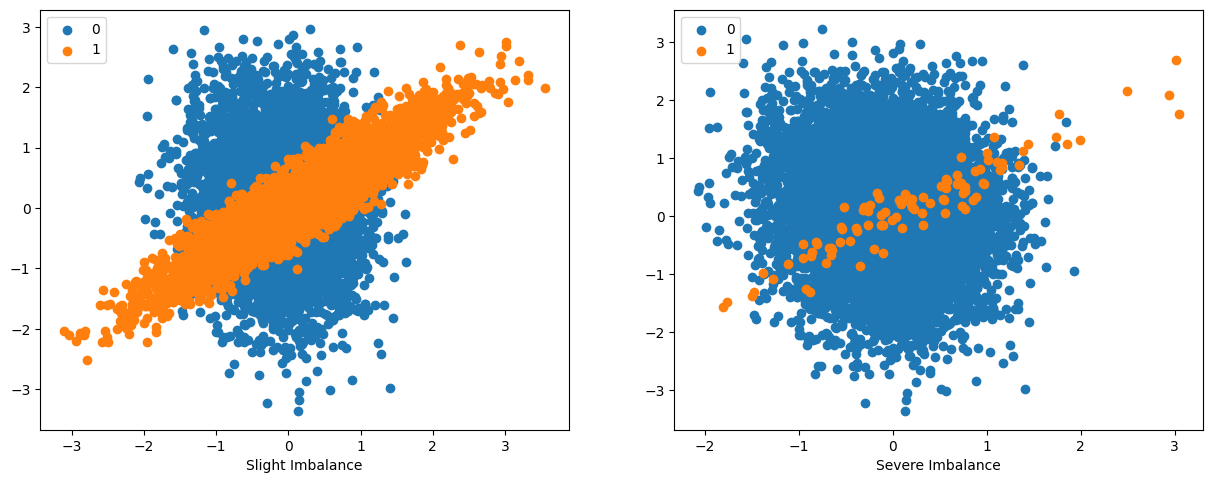

In [10]:
plt.figure(figsize=(15, 12))
plt.subplot(2,2,1)
plt.xlabel('Slight Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_slight == label)[0]
    plt.scatter(X_slight[row_ix, 0], X_slight[row_ix, 1], label=str(label))
    plt.legend()

plt.subplot(2,2,2)
plt.xlabel('Severe Imbalance')

for label, _ in counter_y_slight.items():
    row_ix = where(y_severe == label)[0]
    plt.scatter(X_severe[row_ix, 0], X_severe[row_ix, 1], label=str(label))
    plt.legend()

plt.show()

Dalam visualisasi scatter plot yang ditampilkan, perbedaan antara *slight imbalance* dan *severe imbalance* sangat signifikan. *Severely Imbalaced* ditandai dengan perbandingan jumlah data yang jauh lebih besar antara kelas mayoritas dan minoritas, mencapai rasio 99:1. Sementara itu, pada *Slightly Imbalanced*, perbedaan jumlah data antara kedua kelas tidak terlalu ekstrem, dengan rasio 6:4.

## **Pengaruh Imbalance Dataset Terhadap Performa Model Klasifikasi**

Imbalance dataset akan berpengaruh kepada performa model klasifikasi yang digunakan.
Kita akan menggunakan model Decision Tree dan mengevaluasi model tersebut untuk dataset slight imbalance dan severe imbalance menggunakan beberapa metriks evaluasi. Perhatikan contoh di bawah untuk memahami lebih lanjut.

#### Metode Cross Validation

Evaluasi model di bawah ini akan menggunakan Stratified K-Fold Cross Validation dengan beberapa metrik evaluasi di antaranya: accuracy, f1 (macro), precision (macro), recall (macro).

Disini data - data sintetis hasil penambahan oversampling akan dilibatkan dalam evaluasi model, maka dari itu kita menggunakan Stratified K-Fold Cross Validation. Stratified K-Fold Cross Validation membagi dataset menjadi sejumlah k fold dataset, dimana k fold dataset itu dibagi menjadi training dan validation test dataset. Pada Stratified K-Fold Cross Validation, distribusi kelas pada setiap fold akan dibuat seproporsional mungkin, sehingga folds yang merupakan validation test dataset akan memiliki distribusi kelas yang hampir sama.

1. Evaluasi Model Decision Tree Dengan Slight Imbalance Dataset

In [11]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_slight, y_slight, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.7259
f1_macro score: 0.7147569405355958
precision_macro score: 0.7147813117074711
recall_macro score: 0.7117500000000001


Kesimpulan Pada Hasil Evaluasi Slight Imbalance:
- **Akurasi dan metrik lain relatif seimbang** (selisih <2%)
- Model mampu mempelajari pola kedua kelas dengan baik meski ada ketidakseimbangan kecil
- **Indikator**: Ketika semua metrik (accuracy, F1, precision, recall) memiliki nilai yang relatif sama, model bekerja cukup baik untuk kedua kelas

2. Evaluasi Model Decision Tree Dengan Severe Imbalance Dataset

In [12]:
classifier = DecisionTreeClassifier()

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9825999999999999
f1_macro score: 0.547827251765433
precision_macro score: 0.5445902924117799
recall_macro score: 0.5358585858585858



Kesimpulan Pada Hasil Evaluasi Severe Imbalance:
- **Akurasi sangat tinggi (98.27%)** tetapi metrik lain rendah (~53%)
- **Masalah utama**:
  - Model hanya akurat memprediksi kelas mayoritas
  - Gagal memprediksi kelas minoritas (terlihat dari F1/precision/recall yang rendah)
  - "Accuracy paradox": Akurasi tinggi tapi tidak berguna untuk tujuan bisnis

#### ROC Curve

Kurva ROC (Receiver Operating Characteristic) adalah grafik yang **memvisualisasikan kinerja model klasifikasi biner dengan memplot True Positive Rate (TPR) terhadap False Positive Rate (FPR)** pada berbagai nilai **threshold** klasifikasi. Intinya, kurva ini menunjukkan seberapa baik model dapat **membedakan antara kelas positif dan negatif** seiring dengan perubahan batas keputusannya.

 Pada data tidak seimbang, ROC penting karena:  
- **Akurasi bisa menyesatkan**, sedangkan ROC fokus pada **kinerja kelas minoritas (TPR) vs. kesalahan pada mayoritas (FPR)**.  
- **AUC (Area Under the Curve)** mengukur kualitas pemisahan kelas; semakin mendekati 1, semakin baik.  

ROC membantu memilih *threshold* optimal:  
- *Threshold* rendah → **tingkatkan TPR** (penting jika *false negatif* mahal).  
- *Threshold* tinggi → **kurangi FPR** (penting jika *false positif* mahal).  
Dengan demikian, ROC memberikan **trade-off terbaik** yang tidak terlihat dari akurasi saja.

1. ROC Curve untuk Slightly Imbalanced Dataset

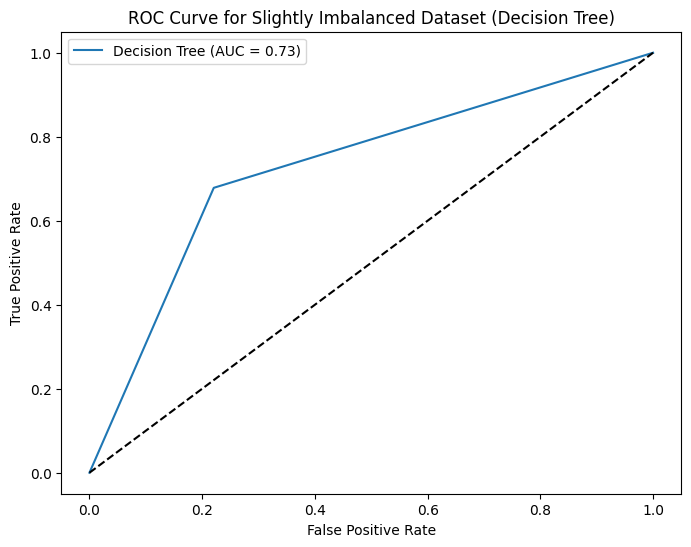

In [13]:
# Split data menjadi training dan testing untuk evaluasi ROC curve
X_train_slight, X_test_slight, y_train_slight, y_test_slight = train_test_split(
    X_slight, y_slight, test_size=0.3, stratify=y_slight, random_state=42
)

# Inisialisasi model Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Latih model pada data training
classifier.fit(X_train_slight, y_train_slight)

# Prediksi probabilitas pada data testing
y_pred_proba_slight = classifier.predict_proba(X_test_slight)[:, 1]

# Hitung ROC curve dan AUC
fpr_slight, tpr_slight, thresholds_slight = roc_curve(y_test_slight, y_pred_proba_slight)
auc_slight = roc_auc_score(y_test_slight, y_pred_proba_slight)

# Visualisasikan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_slight, tpr_slight, label=f'Decision Tree (AUC = {auc_slight:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Slightly Imbalanced Dataset (Decision Tree)')
plt.legend()
plt.show()

Penjelasan ROC Curve pada evaluasi model Decision Tree pada Slightly Imbalanced Dataset:

- **Kinerja Baik**: Kemampuan kuat membedakan kelas positif/negatif (nilai AUC 0.81 tergolong baik)  
- **Keunggulan**:  
  - Jauh lebih akurat daripada tebakan acak (*AUC=0.5*)  
  - Mencapai **TPR tinggi** dengan **FPR rendah** di awal (model efektif mendeteksi positif tanpa banyak kesalahan)  
  - Kenaikan FPR stabil saat mengejar TPR lebih tinggi (*tidak melonjak drastis*)  
- **Implikasi**: Cocok untuk dataset *slightly imbalanced* dengan kebutuhan prediksi seimbang.  

2. ROC Curve untuk Severely Imbalanced Dataset

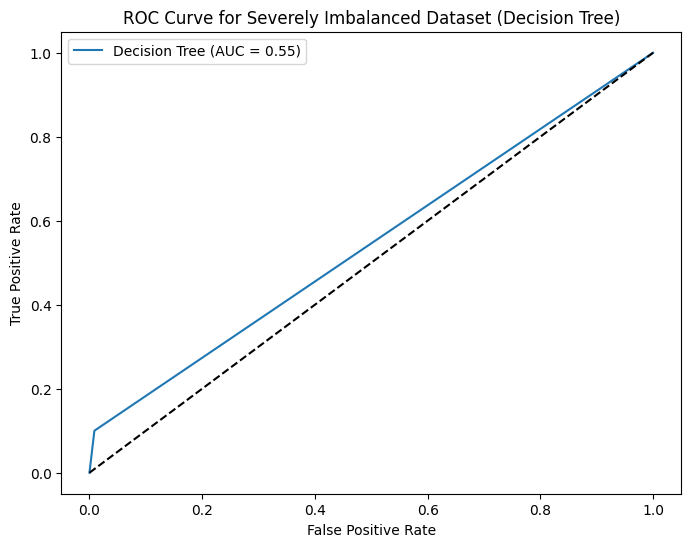

In [14]:
# Split data menjadi training dan testing untuk evaluasi ROC curve
X_train_severe, X_test_severe, y_train_severe, y_test_severe = train_test_split(
    X_severe, y_severe, test_size=0.3, stratify=y_severe, random_state=42
)

# Inisialisasi model Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)

# Latih model pada data training
classifier.fit(X_train_severe, y_train_severe)

# Prediksi probabilitas pada data testing
y_pred_proba_severe = classifier.predict_proba(X_test_severe)[:, 1]

# Hitung ROC curve dan AUC
fpr_severe, tpr_severe, thresholds_severe = roc_curve(y_test_severe, y_pred_proba_severe)
auc_severe = roc_auc_score(y_test_severe, y_pred_proba_severe)

# Visualisasikan ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_severe, tpr_severe, label=f'Decision Tree (AUC = {auc_severe:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Severely Imbalanced Dataset (Decision Tree)')
plt.legend()
plt.show()

Penjelasan ROC Curve pada evaluasi model Decision Tree pada Severely Imbalanced Dataset:

- **Kurva Biru (Decision Tree)**: Menunjukkan trade-off antara **TPR (Sensitivity)** dan **FPR** di berbagai *threshold*.  
- **AUC = 0.55**: Menandakan kemampuan model **sedang (di atas tebakan acak, tapi jauh dari sempurna)** dalam membedakan kelas minoritas dan mayoritas.  
- **Bentuk Kurva**:  
  - Di atas garis diagonal (*AUC > 0.5*) → Lebih baik dari tebakan acak.  
  - Awalnya **TPR naik cepat** saat FPR rendah, lalu melambat → Untuk **TPR lebih tinggi**, model harus **menerima FPR yang lebih besar**.  


**Perbandingan dengan Severely Imbalanced**:

Terlihat jelas bahwa penanganan dataset yang *slightly imbalanced* menghasilkan AUC yang jauh lebih tinggi (0.73) dibandingkan dengan dataset yang *severely imbalanced* (0.55). Perbedaan signifikan ini **menggarisbawahi betapa krusialnya mengatasi ketidakseimbangan data**. Ketika ketidakseimbangan ekstrem, seperti pada kasus *severely imbalanced*, model kesulitan mempelajari karakteristik kelas minoritas yang sedikit jumlahnya, sehingga kemampuan pembedaannya menurun drastis.

Sebaliknya, distribusi kelas yang lebih merata pada dataset *slightly imbalanced* memungkinkan model Decision Tree untuk lebih efektif mengenali pola dari kedua kelas, yang pada akhirnya meningkatkan kinerja klasifikasi secara keseluruhan, seperti yang tercermin pada nilai AUC yang lebih baik. Ini memperjelas bahwa **mengabaikan ketidakseimbangan data dapat secara serius menghambat performa model, terutama dalam mengidentifikasi kelas minoritas yang seringkali menjadi fokus utama dalam banyak permasalahan nyata.**

### Rekomendasi Metrik Evaluasi:

| Situasi | Metrik yang Direkomendasikan |
|---------|-----------------------------|
| Slight imbalance | Accuracy masih bisa digunakan |
| Severe imbalance | F1-score, Precision, Recall (terutama untuk kelas minoritas) |
| Kasus kritis (e.g. medis) | Recall kelas minoritas paling penting |

**Catatan**: StratifiedKFold digunakan untuk menjaga proporsi kelas tiap fold, sehingga evaluasi lebih valid untuk imbalanced data.

![How-to-Deal-With-Imbalanced-Classification-and-Regression-Data_29-3372336075-1643136560469](https://i.imgur.com/FIboBIz.png)

*Sumber: [How to Deal With Imbalanced Classification and Regression Data.](https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data)*

## **Penanganan Imbalanced Dataset**

Evaluasi sebelumnya telah menegaskan betapa krusialnya memeriksa ketidakseimbangan dalam suatu dataset. Hal ini menjadi sangat penting, terutama ketika fokus analisis tertuju pada pemahaman atau prediksi kelas minoritas.

Selanjutnya, akan ditunjukkan beberapa metode/teknik untuk menangani dataset. Dataset Severly Imbalanced sebelumnya akan kita gunakan untuk mempelajari setiap tipe dari penanganan imbalanced dataset.

In [15]:
X = X_severe
y = y_severe

In [16]:
import matplotlib.pyplot as plt
from collections import Counter
from numpy import where

# Jalankan method ini yang berguna untuk memvisualisasikan perbandingan dua buat dataset
def show_simulated_dataset_comparison(X1, X2, y1, y2, title1='Original dataset', title2='Sampling Dataset'):
    counter_y1 = Counter(y1)
    counter_y2 = Counter(y2)
    plt.figure(figsize=(15, 12))

    plt.subplot(2, 2, 1)
    plt.xlabel(f'{title1}\n{counter_y1}')  # Tambahkan jumlah kelas pada label sumbu x
    for label, _ in counter_y1.items():
        row_ix = where(y1 == label)[0]
        plt.scatter(X1[row_ix, 0], X1[row_ix, 1], label=f'{label} ({counter_y1[label]} buah)') # Tambahkan jumlah pada legend
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.xlabel(f'{title2}\n{counter_y2}')  # Tambahkan jumlah kelas pada label sumbu x
    for label, _ in counter_y2.items():
        row_ix = where(y2 == label)[0]
        plt.scatter(X2[row_ix, 0], X2[row_ix, 1], label=f'{label} ({counter_y2[label]} buah)') # Tambahkan jumlah pada legend
    plt.legend()

    plt.show()

### **Oversampling**

Oversampling adalah teknik untuk mengatasi ketidakseimbangan data dengan **memperbanyak jumlah sampel dari kelas minoritas** dalam dataset. Proses penambahan data ini umumnya terbagi dua cara: **duplikasi data** yang sudah ada dan pembentukan **data sintetik baru**.

Salah satu cara sederhana untuk menduplikasi data adalah random oversampling. Sementara itu, beberapa contoh metode yang lebih canggih dalam membuat data sintetik meliputi:

- Synthetic Minority Oversampling Technique (**SMOTE**),
- **Borderline-SMOTE**,
- **Borderline Oversampling** with **SVM**, dan
- Adaptive Synthetic Sampling (**ADASYN**).

Berikutnya, kita akan mempelajari definisi dasar dan cara mengimplementasikan kelima metode oversampling ini pada dataset simulasi yang kita gunakan. Untuk pemahaman yang lebih mendalam, disarankan untuk merujuk kembali pada materi kuliah atau sumber informasi lain di internet.

#### Random Oversampling

Metode oversampling yang menambahkan data minoritas dengan menduplikasikan data yang sudah ada secara acak. Data-data baru yang merupakan hasil penduplikasian tidak akan menambah informasi baru atau mensintesis datapoints baru/berbeda pada dataset

Counter({np.int64(0): 9900, np.int64(1): 9900})


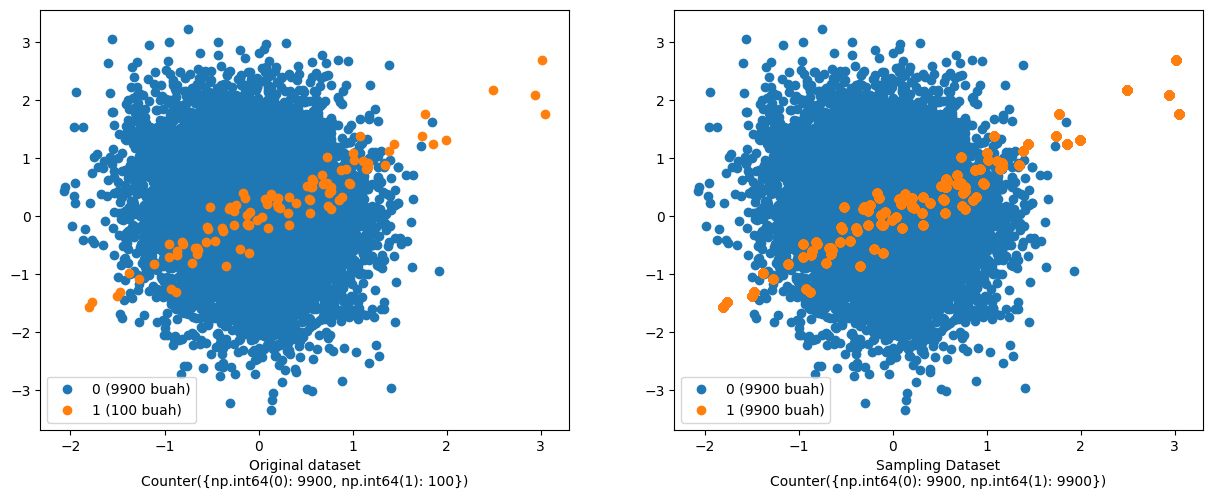

In [17]:
# Definisi random undersampling class
rand_over = RandomOverSampler(
    sampling_strategy='minority'
)

# Resampling berdasarkan dataset simulasi
X_rand_over, y_rand_over = rand_over.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_over = Counter(y_rand_over)
print(counter_y_rand_over)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_rand_over, y1=y, y2=y_rand_over)

Berdasarkan visualisasi scatter plot, tidak tampak perubahan signifikan antara dataset awal dan dataset setelah penerapan *random oversampling*. Ini disebabkan oleh metode *random oversampling* yang hanya menduplikasikan data yang sudah ada dari kelas minoritas di lokasi yang sama persis. Akibatnya, titik-titik data baru hasil *oversampling* bertumpuk dengan data aslinya, sehingga tidak menciptakan perbedaan visual yang jelas pada plot.

#### Synthetic Minority Oversampling Technique (SMOTE)

Berbeda dengan Random Oversampling, SMOTE mensintesis data baru dengan melakukan interpolasi antara data kelas minoritas dan data tetangganya. Tahapannya:
1. SMOTE memilih satu instance dari kelas minoritas secara acak dan mencari k nearest minority class neighbors nya
2. Pilih salah satu neighbor secara acak
3. Data baru yang dihasilkan akan terletak pada garis yang menghubungkan instance dan neighbornya

![SMOTE](https://i.imgur.com/OERi3e0.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.37*

Counter({np.int64(0): 9900, np.int64(1): 9900})


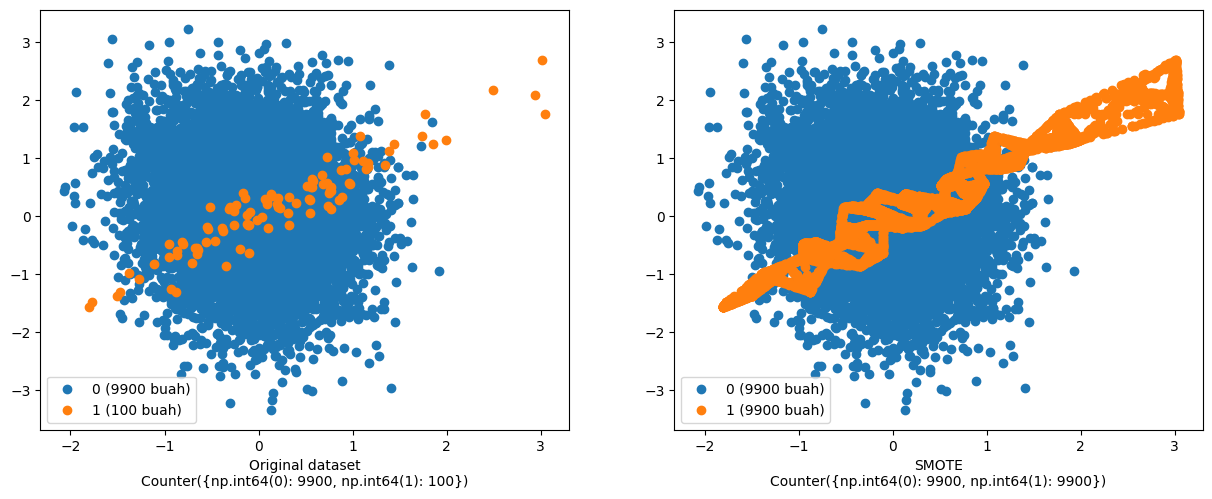

In [18]:
# Definisi SMOTE class
smote = SMOTE()

# Resampling berdasarkan dataset simulasi
X_smote, y_smote = smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_smote = Counter(y_smote)
print(counter_y_smote)

# Perbandingan scatter plot antara dataset asli dan dataset sampling
show_simulated_dataset_comparison(X1=X, X2=X_smote,
                                  y1=y, y2=y_smote,
                                  title2='SMOTE')

#### Borderline-SMOTE

Variasi dari metode SMOTE berfokus pada pembuatan data sintetis secara khusus untuk sampel kelas minoritas yang keliru diprediksi sebagai kelas mayoritas. Pendekatan ini, misalnya menggunakan model K-nearest neighbor, mengidentifikasi sampel kelas minoritas yang lokasinya berdekatan dengan sampel kelas mayoritas (area *missclassified*).

![Borderline-SMOTE](https://i.imgur.com/01UGsei.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.47*

Counter({np.int64(0): 9900, np.int64(1): 9900})


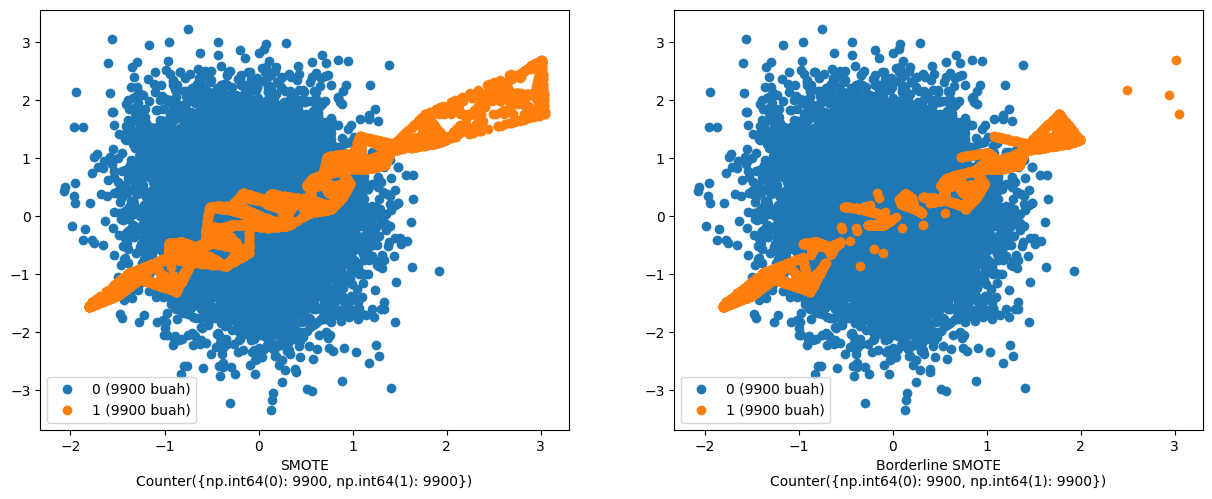

In [19]:
# Definisi Borderline SMOTE class
borderline_smote = BorderlineSMOTE()

# Resampling berdasarkan dataset simulasi
X_borderline_smote, y_borderline_smote = borderline_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_borderline_smote = Counter(y_borderline_smote)
print(counter_y_borderline_smote)

# Perbandingan scatter plot antara dataset SMOTE dan dataset Borderline SMOTE
show_simulated_dataset_comparison(X1=X_smote, X2=X_borderline_smote,
                                  y1=y_smote, y2=y_borderline_smote,
                                  title1='SMOTE', title2='Borderline SMOTE')

#### Borderline Oversampling with SVM

Metode ini, alih-alih memakai KNN untuk pra-klasifikasi data minoritas sebelum oversampling, menggunakan algoritma Support Vector Machine (SVM).

SVM dipakai untuk mengidentifikasi sampel minoritas yang berada di "batas" antara kelas mayoritas dan minoritas, lalu SMOTE diterapkan hanya pada sampel-sampel batas ini dengan harapan menghasilkan data sintetis yang lebih informatif dan efektif dalam meningkatkan batas keputusan klasifikasi.

Counter({np.int64(0): 9900, np.int64(1): 9900})


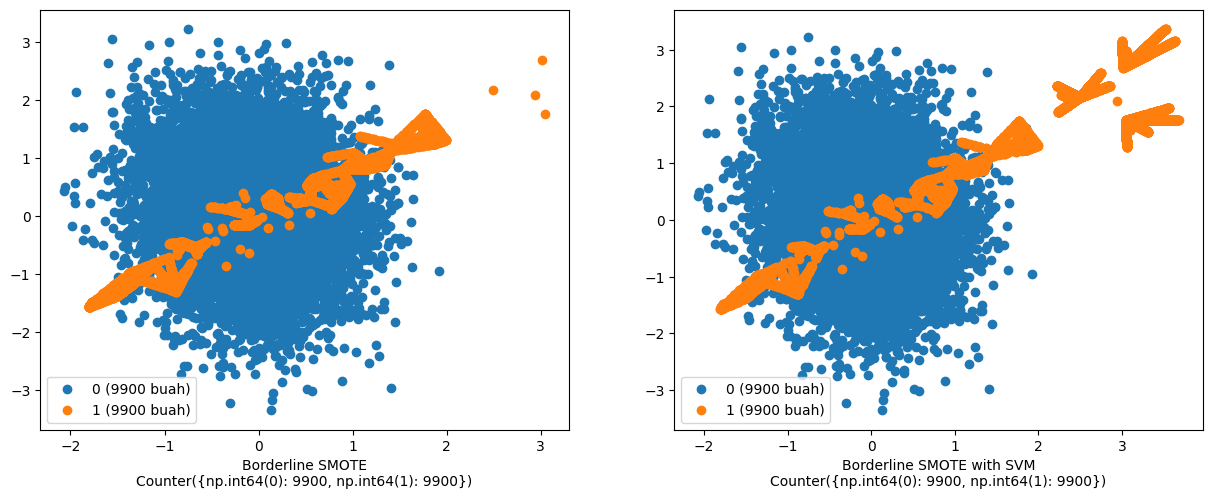

In [20]:
# Definisi Borderline SMOTE dengan SVM class
svm_smote = SVMSMOTE()

# Resampling berdasarkan dataset simulasi
X_svm_smote, y_svm_smote = svm_smote.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_svm_smote = Counter(y_svm_smote)
print(counter_y_svm_smote)

# Perbandingan scatter plot antara dataset Borderline SMOTE dan dataset Borderline SMOTE with SVM
show_simulated_dataset_comparison(X1=X_borderline_smote, X2=X_svm_smote,
                                  y1=y_borderline_smote, y2=y_svm_smote,
                                  title1='Borderline SMOTE', title2='Borderline SMOTE with SVM')

#### Adaptive Synthetic Sampling (ADASYN)

Dengan ADASYN, pembuatan data sintetik untuk kelas minoritas disesuaikan dengan seberapa sedikitnya data minoritas di sekitarnya dalam ruang fitur. Artinya, **area dengan populasi data minoritas yang rendah akan menghasilkan lebih banyak data sintetik**, sementara **area dengan banyak data minoritas akan menghasilkan lebih sedikit atau bahkan tidak ada data sintetik baru**.

![ADASYN](https://i.imgur.com/GfntcLW.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.52*

Counter({np.int64(1): 9925, np.int64(0): 9900})


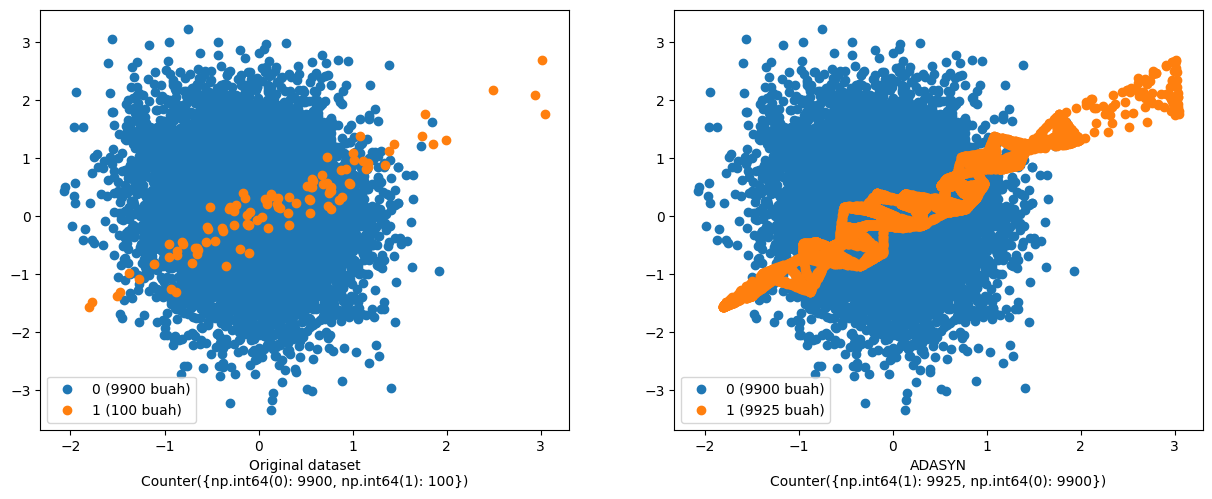

In [19]:
# Definisi ADASYN class
adasyn = ADASYN()

# Resampling berdasarkan dataset simulasi
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_adasyn = Counter(y_adasyn)
print(counter_y_adasyn)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_adasyn,
                                  y1=y, y2=y_adasyn,
                                  title2='ADASYN')

### **Undersampling**

Undersampling adalah cara lain untuk menyeimbangkan distribusi kelas dalam dataset, yaitu dengan **mengurangi jumlah data dari kelas mayoritas**. Hal ini dilakukan misalnya dengan kelas mayoritas dari 1:99 menjadi 1:10, 1:1, dsb.

Beberapa metode undersampling yang umum digunakan antara lain:

- **Random Undersampling**,
- **Near Miss Undersampling**, dan
- **Tomek Link Undersampling**.

Selanjutnya, kita akan membahas definisi sederhana dan cara mengimplementasikan ketiga metode undersampling ini menggunakan dataset simulasi yang telah kita buat sebelumnya.

#### Random Undersampling

Metode ini melakukan pengambilan sampel secara acak dari kelas mayoritasnya untuk dihapus dari keseluruhan dataset.

Counter({np.int64(0): 100, np.int64(1): 100})


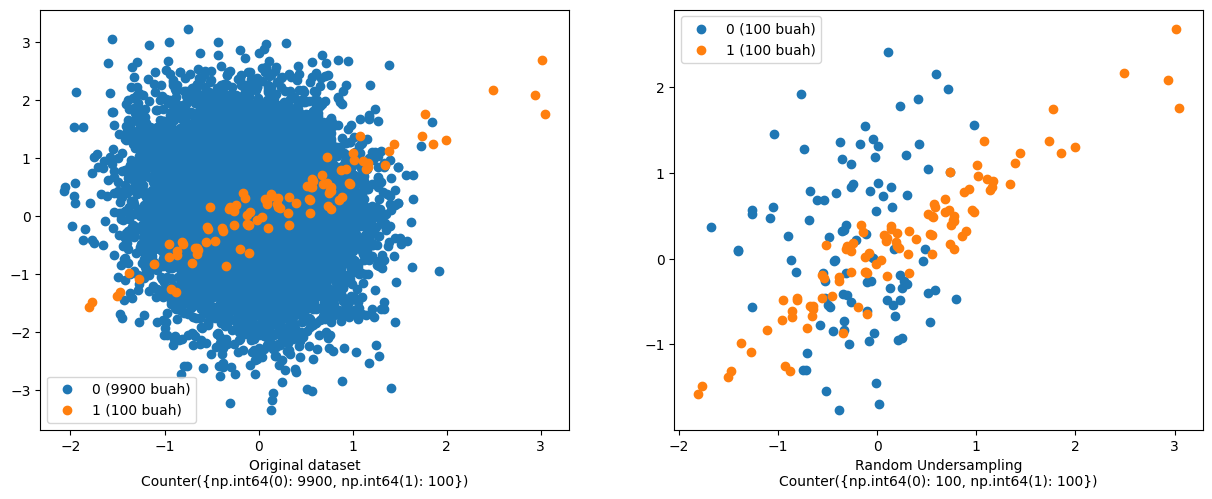

In [21]:
# Definisi ADASYN class
rand_under = RandomUnderSampler(
    sampling_strategy='majority'
)

# Resampling berdasarkan dataset simulasi
X_rand_under, y_rand_under = rand_under.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_rand_under = Counter(y_rand_under)
print(counter_y_rand_under)

# Perbandingan scatter plot antara dataset asli dan dataset ADASYN
show_simulated_dataset_comparison(X1=X , X2=X_rand_under,
                                  y1=y, y2=y_rand_under,
                                  title2='Random Undersampling')

#### Near Miss Undersampling

Near Miss Undersampling adalah metode pengurangan sampel kelas mayoritas yang memilih data berdasarkan **kedekatan jaraknya dengan data dari kelas minoritas**. Metode ini memiliki beberapa variasi, yaitu **NearMiss-1**, **NearMiss-2**, dan **NearMiss-3**.

![NearMiss](https://i.imgur.com/2pJbqE7.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.58*

1. NearMiss-1

Memilih sample dari kelas mayoritas yang memiliki jarak rata-rata terkecil terhadap tiga sample terdekat dari kelas minoritas.

Counter({np.int64(0): 100, np.int64(1): 100})


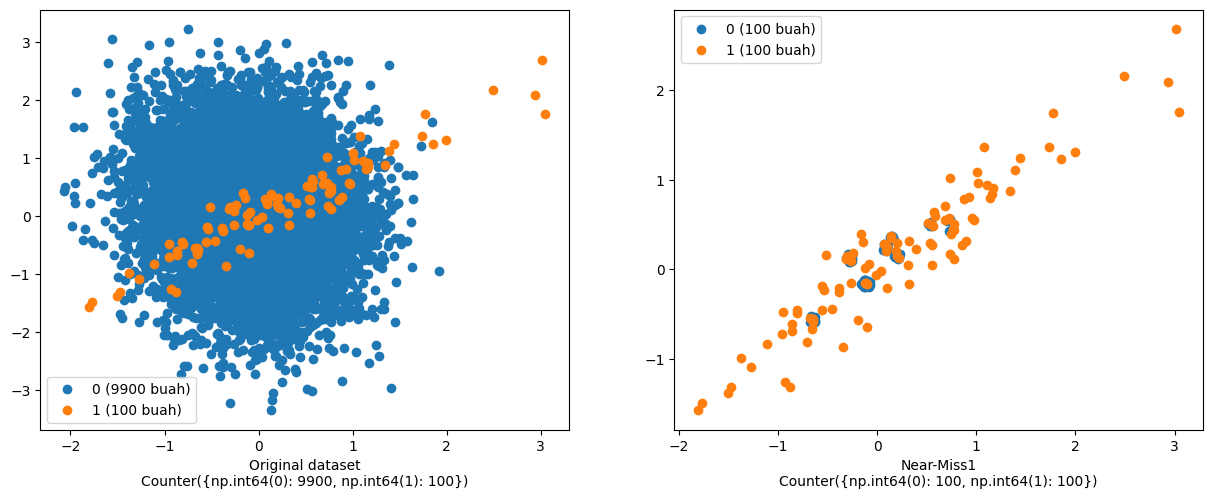

In [22]:
# Definisi Near Miss 1 class
nearmiss = NearMiss()

# Resampling berdasarkan dataset simulasi
X_nearmiss, y_nearmiss = nearmiss.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss = Counter(y_nearmiss)
print(counter_y_nearmiss)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss1
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss,
                                  y1=y, y2=y_nearmiss,
                                  title2='Near-Miss1')

2. NearMiss-2

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terbesar ke tiga sampel kelas minoritas terdekat.

Counter({np.int64(0): 100, np.int64(1): 100})


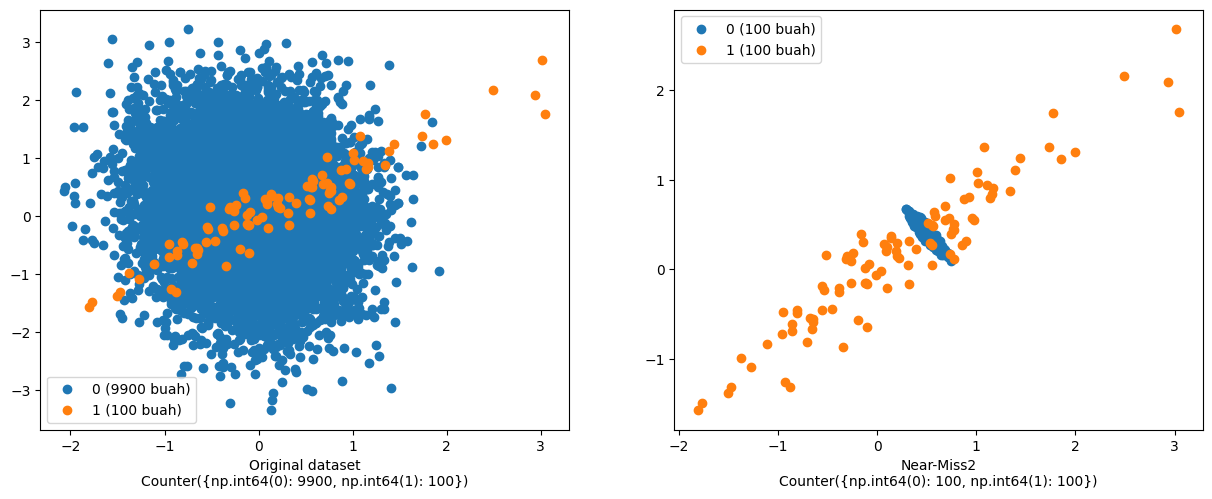

In [23]:
# Definisi Near Miss 2 class
nearmiss2 = NearMiss(version=2)

# Resampling berdasarkan dataset simulasi
X_nearmiss2, y_nearmiss2 = nearmiss2.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss2 = Counter(y_nearmiss2)
print(counter_y_nearmiss2)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss2
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss2,
                                  y1=y, y2=y_nearmiss2,
                                  title2='Near-Miss2')

3. NearMiss-3

Memilih sampel dari kelas mayoritas yang memiliki jarak rata-rata terkecil ke setiap sampel kelas minoritas.

Counter({np.int64(0): 100, np.int64(1): 100})


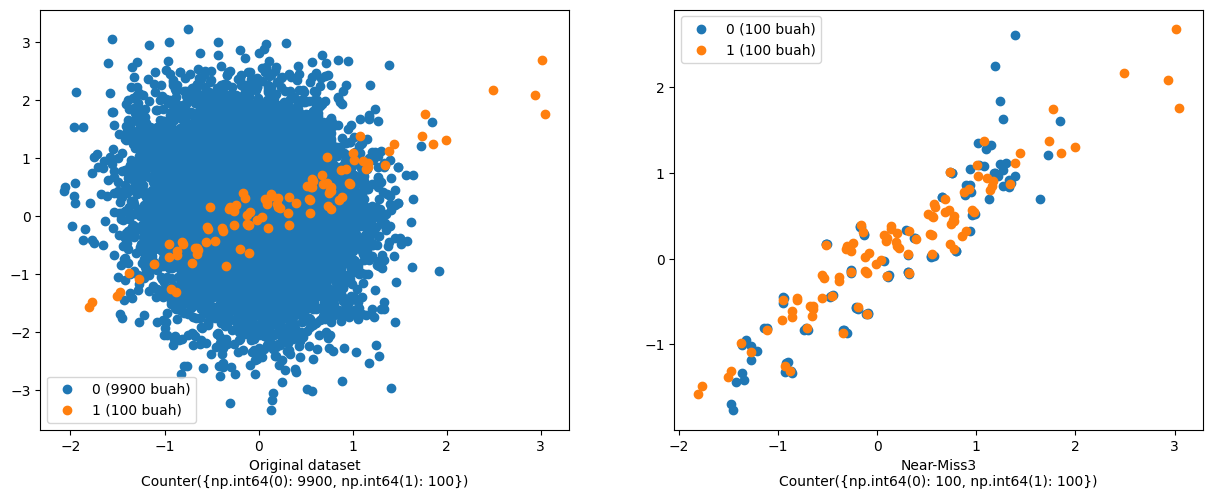

In [24]:
# Definisi Near Miss 3 class
nearmiss3 = NearMiss(version=3)

# Resampling berdasarkan dataset simulasi
X_nearmiss3, y_nearmiss3 = nearmiss3.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_nearmiss3 = Counter(y_nearmiss3)
print(counter_y_nearmiss3)

# Perbandingan scatter plot antara dataset asli dan dataset Near-Miss3
show_simulated_dataset_comparison(X1=X , X2=X_nearmiss3,
                                  y1=y, y2=y_nearmiss3,
                                  title2='Near-Miss3')

#### Tomek Link Undersampling

Tomek Link Undersampling mengurangi sampel kelas mayoritas dengan cara mengidentifikasi dan menghapus *Tomek Link*. *Tomek Link* adalah pasangan sampel (*a* dan *b*) yang memenuhi tiga kriteria:

1. *b* adalah tetangga terdekat dari *a*,
2. *a* adalah tetangga terdekat dari *b*, dan
3. *a* serta *b* berasal dari kelas yang berbeda.

Sederhananya, ini adalah pasangan data dari kelas yang berlawanan yang saling menjadi tetangga terdekat.

![TomekLink](https://i.imgur.com/gZaHcPL.png)

*Sumber: Slide Imbalance Classification KASDAD Hal.62*

Counter({np.int64(0): 9847, np.int64(1): 100})


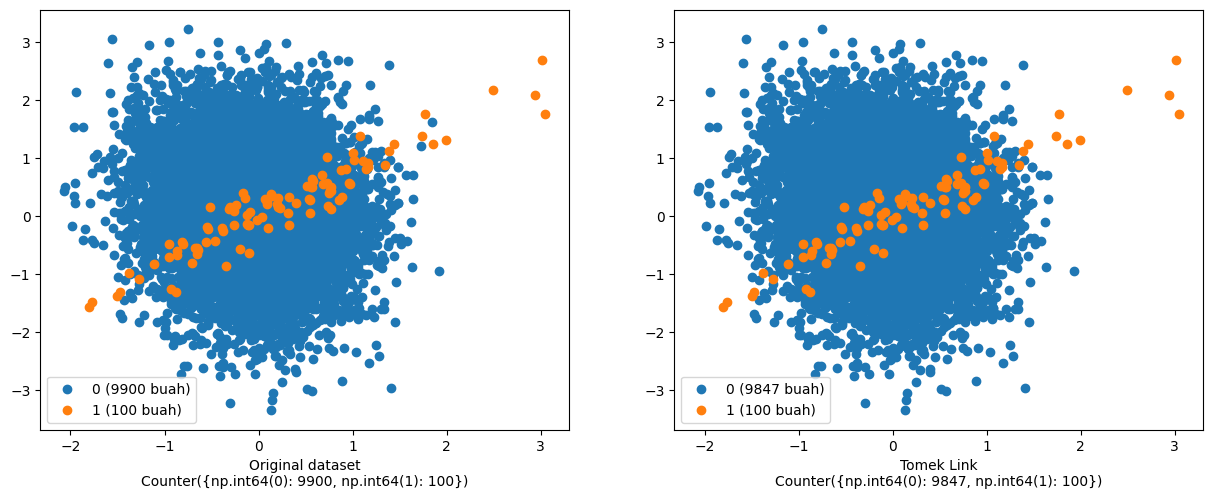

In [25]:
# Definisi Tomek Link class
tomek = TomekLinks()

# Resampling berdasarkan dataset simulasi
X_tomek, y_tomek = tomek.fit_resample(X, y)

# Distribusi kelas pada dataset
counter_y_tomek = Counter(y_tomek)
print(counter_y_tomek)

# Perbandingan scatter plot antara dataset asli dan dataset Tomek Link
show_simulated_dataset_comparison(X1=X , X2=X_tomek,
                                  y1=y, y2=y_tomek,
                                  title2='Tomek Link')

Dari visualisasi di atas, tertulis bahwa data kelas mayoritas hanya berkurang dari 9900 menjadi 9851 (berkurang sebanyak 49 data saja). Tomek Link ini menghapus sedikit data mayoritas karena harus memenuhi ketiga kriteria tersebut.

## **Cost Sensitive Learning**

**Klasifikasi dengan Konsekuensi Nyata: Belajar dari Kasus Pinjaman Bank**  

Dalam dunia perbankan, keputusan pemberian pinjaman adalah contoh nyata bagaimana klasifikasi bisa berdampak besar. Bayangkan jika bank salah menolak nasabah yang sebenarnya layak (*False Negative*) – konsekuensinya relatif kecil, mungkin hanya mengecewakan calon debitur. Namun jika bank salah menyetujui nasabah yang tidak mampu membayar (*False Positive*), dampaknya bisa sangat merugikan karena berpotensi menimbulkan kerugian finansial besar. Inilah mengapa kita perlu pendekatan khusus yang disebut **Cost-Sensitive Learning**.

**Mengapa Cost-Sensitive Learning Penting?**  
- Setiap jenis kesalahan punya konsekuensi berbeda  
- Dalam kasus pinjaman:  
  - *False Positive* (salah setujui) = kerugian besar (cost tinggi)  
  - *False Negative* (salah tolak) = dampak kecil (cost rendah)  
- Berbeda dengan accuracy biasa yang menganggap semua kesalahan sama  

**Cara Kerja Cost-Sensitive Learning**  
Teknik ini memprioritaskan pengurangan kesalahan yang paling mahal dengan:  
✔ **Pemberian bobot berbeda**  
   - Contoh: Kelas minoritas (nasabah buruk) diberi bobot 99 vs kelas mayoritas (nasabah baik) bobot 1  
✔ **Algoritma khusus** yang secara eksplisit menghitung biaya kesalahan selama pelatihan  
✔ **Ensemble model** yang menggabungkan prediksi untuk meminimalkan total biaya  

**Mengapa ini bisa diimplementasikan untuk Imbalanced Dataset?**  
Dibanding sekadar menyeimbangkan data, pendekatan ini:  
- Lebih realistis karena menyesuaikan dengan dampak bisnis nyata  
- Memungkinkan model fokus pada kesalahan yang benar-benar mahal  
- Tetap mempertimbangkan ketidakseimbangan data melalui penyesuaian bobot  

Dengan strategi ini, bank bisa membuat keputusan yang lebih cerdas – bukan sekedar akurat secara statistik, tapi juga bijak secara finansial.

Kita akan menerapkan Cost Sensitive Algorithm pada Decision Tree untuk melakukan imbalanced classification.

### Cost Sensitive Decision Tree

Dengan model Decision Tree yang sudah dipelajari, kita akan mencoba algoritma *cost-sensitive*. Mari kita lihat dulu bagaimana kinerja Decision Tree biasa pada data *imbalanced* **tanpa memberikan bobot** khusus pada setiap kelas.

In [26]:
decision_tree = DecisionTreeClassifier(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9827
f1_macro score: 0.5389460604605365
precision_micro score: 0.9827
precision_macro score: 0.543854254759847
recall_micro score: 0.9827
recall_macro score: 0.5359090909090909


Selanjutnya, kita akan mengevaluasi Decision Tree dengan memberikan bobot yang berbeda untuk setiap kelas. Karena **kelas 0 memiliki 9900 sampel** dan **kelas 1 hanya 100 sampel**, kita akan mencoba memberikan **bobot yang berlawanan** dengan distribusinya:
- **kelas 0** diberi **bobot 100**
- **kelas 1** diberi **bobot 9900**

Penting untuk diingat bahwa bobot ini mungkin belum yang terbaik, karena bobot yang terlalu besar pada kelas minoritas bisa membuat model jadi terlalu fokus padanya.

In [27]:
weights = {0:100, 1:9900}

decision_tree = DecisionTreeClassifier(class_weight=weights)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(decision_tree, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9843999999999999
f1_macro score: 0.5672118794244141
precision_micro score: 0.9847999999999999
precision_macro score: 0.5771733938683103
recall_micro score: 0.984
recall_macro score: 0.5564646464646464


Terlihat adanya perbedaan pada skor macro yang menunjukkan bahwa penerapan cost sensitive learning pada decision tree berhasil memperbaiki sedikit lebih baik
klasifikasi model tersebut.

# **Neural Network**

Neural Network (NN) adalah algoritma dalam machine learning yang meniru cara kerja neuron di otak manusia. Salah satu jenis Neural network yang populer untuk digunakan adalah **Multi Layer Perceptron (MLP)**. MLP ini terdiri dari **sejumlah perceptron yang disusun menjadi beberapa layer**, yang mana masing-masing perceptron tersebut memiliki peran tertentu.

![Multi Layer Perceptron](https://www.researchgate.net/publication/334609713/figure/fig1/AS:783455927406593@1563801857102/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single.jpg)

*Sumber: A Guide for Using Deep Learning for Complex Trait Genomic Prediction - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/Multi-Layer-Perceptron-MLP-diagram-with-four-hidden-layers-and-a-collection-of-single_fig1_334609713*

**Arsitektur Dasar Multi-Layer Perceptron (MLP)**

MLP memiliki struktur berlapis yang terdiri dari tiga komponen utama:

1. **Input Layer (Lapisan Masukan)**:
- Berfungsi sebagai pintu masuk data ke dalam jaringan
- Jumlah neuronnya ditentukan oleh jumlah fitur dalam dataset
- Contoh: Dataset dengan 5 fitur akan memiliki 5 neuron input

2. **Hidden Layer (Lapisan Tersembunyi)**:
- Lapisan pemrosesan utama yang melakukan komputasi
- Menerima sinyal dari lapisan sebelumnya dan mentransformasikannya untuk diteruskan ke output layer atau hidden layer berikutnya
- Dapat terdiri dari satu atau beberapa lapisan dengan jumlah neuron bervariasi

3. **Output Layer (Lapisan Keluaran)**:
- Menghasilkan prediksi akhir model
- Untuk klasifikasi biner:
  * Biasanya menggunakan 1 neuron output
  * Fungsi aktivasi sigmoid menghasilkan nilai antara 0-1
  * Threshold 0.5 umum digunakan untuk menentukan kelas
    - ≥0.5: Kelas 1
    - <0.5: Kelas 0

Struktur ini memungkinkan MLP untuk mempelajari hubungan non-linear yang kompleks dalam data melalui kombinasi lapisan-lapisan tersebut. Fleksibilitas dalam menentukan jumlah hidden layer dan neuron membuat MLP dapat disesuaikan dengan berbagai jenis masalah machine learning.

**Komponen Utama Setiap Neuron pada Hidden Layer**

Pada hidden layer, setiap neuron memiliki dua komponen utama:

1. **Weight (Bobot)**: merupakan parameter yang dikalikan dengan input dari layer sebelumnya. Weight ini menunjukkan "kekuatan" atau pengaruh masing-masing input pada neuron, yang mana nilainya akan ditentukan dan dioptimalkan selama proses training untuk meminimalkan loss function menggunakan algoritma tertentu, misalnya backpropagation.
2. **Bias**: merupakan sebuah konstanta tambahan yang digunakan untuk menyesuaikan output masing-masing neuron agar lebih sesuai dengan output yang diinginkan.

Neuron merupakan fungsi didefinisikan sebagai

![Neuron](https://i.imgur.com/ytS5Xf7.png)

dengan:
- vektor **x** = (x1, x2, ..., xn) merupakan input,
- vektor **w** = (w1, w2, ..., wn) disebut dengan bobot atau weights,
- konstanta *b* disebut dengan bias, dan
- fungsi *f* disebut dengan fungsi aktivasi. Ada banyak fungsi aktivasi yang dapat digunakan seperti pada gambar dibawah ini:

![Activation function](https://miro.medium.com/max/1400/1*p_hyqAtyI8pbt2kEl6siOQ.png)

Berikutnya, kita akan membuat model klasifikasi *Multilayer Perceptron* (MLP) dengan dua lapisan tersembunyi. Lapisan pertama akan memiliki 30 neuron, dan lapisan kedua akan memiliki 10 neuron. Fungsi aktivasi yang akan digunakan adalah ReLU.

In [28]:
# Definisi MLPClassifier class
mlp_classifier = MLPClassifier(
    alpha=1e-5,
    hidden_layer_sizes=(30,10),
    solver='adam',
    random_state=42,
    activation='relu'
)

In [29]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(mlp_classifier, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9902000000000001
f1_macro score: 0.5165850675366084
precision_micro score: 0.9902000000000001
precision_macro score: 0.6950990495247624
recall_micro score: 0.9902000000000001
recall_macro score: 0.51


Mungkin dengan dataset yang digunakan masih berupa severely imbalanced, didapatkan F1 Macro Score yang tidak terlalu bagus. Oleh karenanya, kita dapat lakukan penanganan imbalanced dataset seperti yang pada metode-metode pada bagian sebelumnya sekaligus menerapkan **pipeline** untuk menggabungkan langkah-langkah tersebut.

## **Pipeline**

Dalam *machine learning*, *pipeline* adalah urutan tahapan yang terstruktur untuk mengolah data dan membangun model. Tahapan ini bisa mencakup pre-processing seperti **imputasi** null values, **normalisasi** atau standarisasi fitur (seperti StandardScaler), dan **encoding**, serta proses lainnya. *Pipeline* membantu mengotomatisasi alur kerja, menjaga konsistensi, dan memastikan hasil dapat diulang.

![Pipeline](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*mEO_PWFmOG_POqpf.png)

*Sumber: [Scikit-learn Pipelines Explained: Streamline and Optimize Your Machine Learning Processes](https://medium.com/@sahin.samia/scikit-learn-pipelines-explained-streamline-and-optimize-your-machine-learning-processes-f17b1beb86a4)*

Dalam imbalanced classification, *pipeline* juga dapat digunakan untuk menerapkan teknik *resampling* pada dataset. Contoh berikut akan menunjukkan cara melakukan *oversampling* dan kemudian membangun model MLPClassifier untuk melakukan klasifikasi menggunakan *pipeline* yang disediakan oleh library `imblearn.pipeline`.

In [30]:
# Membuat pipeline
steps = [('over', SVMSMOTE()), ('model', mlp_classifier)]
pipeline = Pipeline(steps=steps)

In [31]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = ['f1_micro', 'f1_macro', 'precision_micro', 'precision_macro', 'recall_micro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(pipeline, X_severe, y_severe, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

f1_micro score: 0.9179999999999999
f1_macro score: 0.5319399635684832
precision_micro score: 0.9161999999999999
precision_macro score: 0.5274684455633846
recall_micro score: 0.9159
recall_macro score: 0.6877272727272727


Bisa dilihat bahwa skor f1 macro nya naik lebih sedikit dari yang sebelumnya. Ini artinya proses oversampling berhasil dilakukan sebelum melakukan training pada model MLPClassifier, dan hasilnya lebih bagus daripada MLPClassifier yang digunakan pada dataset original.

# **Soal**

## **A. Soal Latihan**

Jawablah 5 soal latihan berikut dengan menuliskan tahapan kode pada *cell* yang tersedia, dan tampilkan hasil akhir jawaban Anda menggunakan fungsi `print()` (selain soal 3).

### 1. **SMOTE Data Points**

Diberikan $x_1(2,4)$ dan $x_2(4,2)$ yang merupakan dua instances yang bertetangga dekat pada kelas minoritas. Jika kita menerapkan teknik SMOTE di antara kedua titik ini, pada interval berapa data baru tersebut mungkin dihasilkan? Lalu tampilkan contoh lima data baru tersebut! (hint: boleh gunakan NumPy)

In [32]:
import numpy as np

x1 = np.array([2, 4])
x2 = np.array([4, 2])

sampel_baru = [x1 + np.random.rand() * (x2 - x1) for _ in range(5)]
sampel_baru = np.array(sampel_baru)

print("5 data baru yang dihasilkan menggunakan teknik SMOTE antara titik x1 dan x2 adalah:")
print(sampel_baru)

5 data baru yang dihasilkan menggunakan teknik SMOTE antara titik x1 dan x2 adalah:
[[2.38038004 3.61961996]
 [3.45749722 2.54250278]
 [3.94003811 2.05996189]
 [3.41840029 2.58159971]
 [2.16425836 3.83574164]]


### 2. **Cost Sensitive Learning**

Diberikan sebuah dataset dengan 100,000 sampel yang terbagi ke dalam tiga kelas sebagai berikut:

* Kelas A: 60,000 sampel
* Kelas B: 30,000 sampel
* Kelas C: 10,000 sampel

Dalam konteks *cost-sensitive learning*, salah satu cara untuk menangani dataset yang tidak seimbang adalah dengan memberikan bobot yang berbanding terbalik dengan frekuensi kelas.

Dengan jumlah total sampel adalah 100,000 dan jumlah kelas adalah 3.
Hitunglah bobot untuk masing-masing kelas (A, B, dan C).


In [33]:
# Jumlah total sampel dan jumlah sampel per kelas
total_samples = 100000
kelas_a_samples = 60000
kelas_b_samples = 30000
kelas_c_samples = 10000

# Menghitung frekuensi tiap kelas
kelas_a_weight = total_samples / (3 * kelas_a_samples)
kelas_b_weight = total_samples / (3 * kelas_b_samples)
kelas_c_weight = total_samples / (3 * kelas_c_samples)

# Menampilkan hasil bobot tiap kelas
print(f"Bobot Kelas (A): {kelas_a_weight}")
print(f"Bobot Kelas (B): {kelas_b_weight}")
print(f"Bobot Kelas (C): {kelas_c_weight}")

Bobot Kelas (A): 0.5555555555555556
Bobot Kelas (B): 1.1111111111111112
Bobot Kelas (C): 3.3333333333333335


### 3.  **Imbalanced Classification Model with ROC Curve Comparison**

Anda diminta melakukan klasifikasi pada imbalanced dataset berukuran 10000 yang terdiri dari 2 kelas: Kelas A sebanyak 99% dan Kelas B sebanyak 1%.

Ada 3 model yang perlu Anda buat, yang terdiri dari:
- Model logistic regression standar
- Model logistic regression dengan teknik oversampling SMOTE
- Model cost sensitive logistic regression, jika diberikan informasi bahwa cost untuk kasus false negative adalah 50 x cost untuk false positive.

Gunakan `random_state=42` pada model, `test_size=0.3` pada `train_test_split`, dan `stratify`. Lalu, lakukan analisis ketiga model yang Anda buat dengan membuat kurva dan membandingkan nilai ROC AUC-nya!

(*hint: Slide Imbalanced Classification KASDAD*)

In [39]:
#Define dataset
X_soal, y_soal = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

#ROC Curve function
def roc_curve_plot(y_test, y_pred_proba, title, model_name):
    # Hitung ROC curve dan AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)

    # Visualisasikan ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

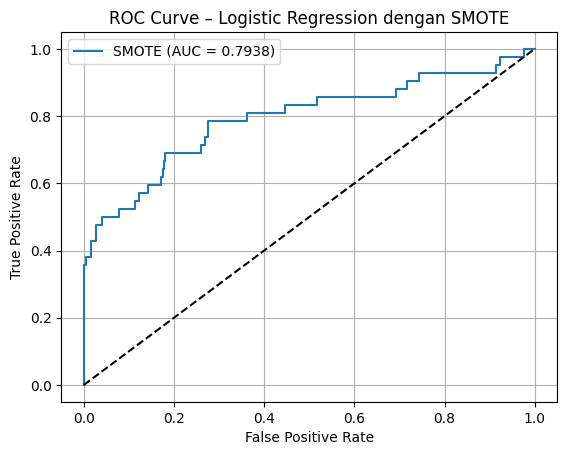

In [38]:
#TODO: Model with SMOTE Oversampling

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_sm, y_train_sm)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]
fpr_smote, tpr_smote, _ = roc_curve(y_test, y_proba_smote)
auc_smote = roc_auc_score(y_test, y_proba_smote)

plt.figure()
plt.plot(fpr_smote, tpr_smote, label=f"SMOTE (AUC = {auc_smote:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression dengan SMOTE")
plt.legend()
plt.grid()
plt.show()

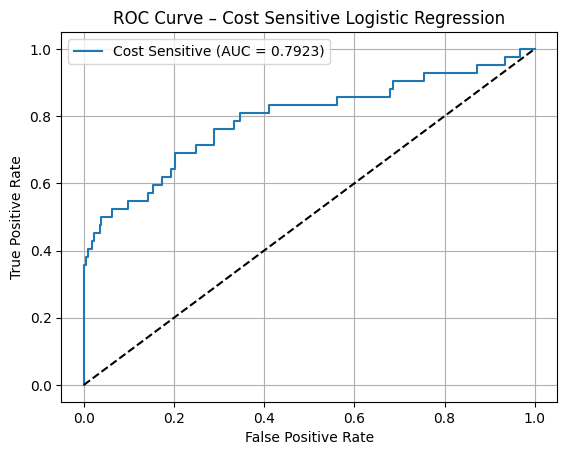

In [40]:
#TODO: Model with Cost Sensitive Learning

model_cost = LogisticRegression(random_state=42, class_weight={0:1, 1:50})
model_cost.fit(X_train, y_train)
y_proba_cost = model_cost.predict_proba(X_test)[:, 1]
fpr_cost, tpr_cost, _ = roc_curve(y_test, y_proba_cost)
auc_cost = roc_auc_score(y_test, y_proba_cost)

plt.figure()
plt.plot(fpr_cost, tpr_cost, label=f"Cost Sensitive (AUC = {auc_cost:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Cost Sensitive Logistic Regression")
plt.legend()
plt.grid()
plt.show()

**Jawaban Anda:**

Dari hasil ketiga model, terlihat bahwa model standar cenderung bias ke kelas mayoritas karena tidak menangani imbalance data. Model dengan SMOTE menunjukkan performa lebih baik dalam mendeteksi kelas minoritas karena distribusi data jadi seimbang. Sementara itu, model cost-sensitive juga menunjukkan peningkatan karena memperhitungkan konsekuensi kesalahan. Secara umum, SMOTE dan cost-sensitive sama-sama lebih baik dibanding model standar.

### 4.  **Neural Networks Feed Forwarding**

Jalankan *Feed Forwarding* untuk mencari $a_1^{(2)}$ berdasarkan struktur *Multi Layer Perceptron* pada gambar berikut!

![MLP](https://i.imgur.com/4W6qbds.png)

Pertama, isi terlebih dahulu variabel yang bersesuaian pada struktur MLP pada gambar tersebut. Selanjutnya, lakukan operasi antar variabel tersebut sehingga didapatkan hasil untuk mencari $a_1^{(2)}$.

(*hint: Slide Neural Networks KASDAD*)

In [92]:
def relu(x):
    return max(0, x)

# Input dan bobot dari layer pertama
x1 = 3
x2 = 2
w11_1 = 0.4
w21_1 = 0.3
w12_1 = -0.5
w22_1 = 0.2
b1_1 = 0.1

# Hitung z1^(2) = x1*w11_1 + x2*w21_1 + bias
z1_2 = x1 * w11_1 + x2 * w21_1 + b1_1

# Hitung a1^(2) = ReLU(z1^(2))
a1_2 = relu(z1_2)

print("Hasil a1_2 adalah:", a1_2)

Hasil a1_2 adalah: 1.9000000000000004


### 5.  **Neural Network Back Propagation**

Jalankan *Back Propagation* untuk mencari $\delta_1^{(2)}$ berdasarkan struktur *Multi Layer Perceptron* pada gambar berikut! Lalu, berapakah nilai $w_{11}^{(1)}$ pada iterasi berikutnya jika `learning rate = 0.1`

![MLP](https://i.imgur.com/uwA2PUj.png)

Lanjutkan pengisian variabel pada layer 2, untuk variabel pada layer 1 dapat gunakan kembali dari cell kode soal 4. Setelah itu, lakukan *Back Propagation* untuk mencari $\delta_1^{(2)}$ dan $w_{11}^{(1)}$!

(*hint: Slide Neural Networks KASDAD*)

In [ ]:
def relu_derivative(x):
    return 1 if x > 0 else 0

learning_rate = 0.1
w11_2 = 0.6
w21_2 = 0.7
delta1_3 = 0.4
delta2_3 = 0.2

z1_2 = 0.7  # hasil dari x1*w11_1 + x2*w21_1 + b
a1_2 = max(0, z1_2)  # ReLU(z1_2), hasilnya tetap 0.7
x1 = 3
w11_1 = 0.4

# Hitung delta1_2 = f'(z1_2) * (w11_2 * delta1_3 + w21_2 * delta2_3)
delta1_2 = relu_derivative(z1_2) * (w11_2 * delta1_3 + w21_2 * delta2_3)

# Update bobot w11_1
w11_1_new = w11_1 - learning_rate * delta1_2 * x1

print("Hasil delta1_2 adalah:", delta1_2)
print("Hasil w11_1 pada iterasi berikutnya adalah:", w11_1_new)

Hasil delta1_2 adalah: 0.38
Hasil w11_1 pada iterasi berikutnya adalah: 0.28600000000000003


## **B. Soal Dataset**

### Deskripsi Dataset

Dataset yang dipakai pada lab ini adalah dataset [Loan Approval](https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data) dengan beberapa modifikasi.

Dataset ini berisi informasi mengenai aplikasi pinjaman dan status persetujuan pinjaman. Tujuan dataset ini adalah untuk memprediksi apakah pinjaman akan disetujui atau ditolak berdasarkan berbagai faktor.

**Penjelasan Kolom:**

* `person_age`: Usia peminjam (Float)
* `person_gender`: Jenis kelamin peminjam (Kategorikal)
* `person_education`: Tingkat pendidikan tertinggi peminjam (Kategorikal)
* `person_income`: Pendapatan tahunan peminjam (Float)
* `person_emp_exp`: Pengalaman kerja peminjam dalam tahun (Integer)
* `person_home_ownership`: Status kepemilikan rumah peminjam (misalnya, sewa, milik sendiri, hipotek) (Kategorikal)
* `loan_amnt`: Jumlah pinjaman yang diajukan (Float)
* `loan_intent`: Tujuan pinjaman (Kategorikal)
* `loan_int_rate`: Tingkat suku bunga pinjaman (Float)
* `loan_percent_income`: Jumlah pinjaman sebagai persentase dari pendapatan tahunan (Float)
* `cb_person_cred_hist_length`: Lama riwayat kredit peminjam dalam tahun (Float)
* `credit_score`: Skor kredit peminjam (Integer)
* `previous_loan_defaults_on_file`: Indikator riwayat gagal bayar pinjaman sebelumnya (Kategorikal)
* `loan_status (target variable)`: Status persetujuan pinjaman: 1 = disetujui; 0 = ditolak (Integer)

Target variable dataset ini adalah `loan_status`.

In [94]:
def show_simulated_dataset(X, y, title='Dataset Visualization',
                           feature_x="1", feature_y="2"):
    counter_y = Counter(y)
    plt.figure(figsize=(12, 10))

    majority_label = max(counter_y, key=counter_y.get)
    minority_label = min(counter_y, key=counter_y.get)

    fixed_colors = {0: 'red', 1: 'blue'}

    labels = {}
    for lbl, cnt in counter_y.items():
        role = 'Majority' if lbl == majority_label else 'Minority'
        labels[lbl] = f'{role} (Class {lbl}: {cnt})'

    for lbl in counter_y:
        idx = where(y == lbl)[0]
        plt.scatter(X[idx, 0], X[idx, 1],
                    label=labels[lbl],
                    color=fixed_colors.get(lbl, 'gray'),
                    alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature: ' + feature_x)
    plt.ylabel('Feature: ' + feature_y)
    plt.legend(title='Class Distribution', loc='upper right')
    plt.show()


In [95]:
df_loan = pd.read_csv("loan.csv")

In [96]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      10500 non-null  float64
 1   person_gender                   10500 non-null  object 
 2   person_education                10500 non-null  object 
 3   person_income                   10500 non-null  float64
 4   person_emp_exp                  10500 non-null  int64  
 5   person_home_ownership           10500 non-null  object 
 6   loan_amnt                       10500 non-null  float64
 7   loan_intent                     10500 non-null  object 
 8   loan_int_rate                   10500 non-null  float64
 9   loan_percent_income             10500 non-null  float64
 10  cb_person_cred_hist_length      10500 non-null  float64
 11  credit_score                    10500 non-null  int64  
 12  previous_loan_defaults_on_file  

In [97]:
df_loan.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,28.0,male,Associate,72926.0,2,MORTGAGE,16800.0,DEBTCONSOLIDATION,12.61,0.23,7.0,586,Yes,0
1,23.0,female,Associate,72988.0,0,MORTGAGE,4500.0,MEDICAL,7.40,0.06,3.0,562,Yes,0
2,22.0,male,Associate,78823.0,0,MORTGAGE,4000.0,DEBTCONSOLIDATION,7.14,0.05,4.0,624,Yes,0
3,23.0,male,Bachelor,79971.0,0,RENT,12000.0,VENTURE,11.01,0.15,4.0,671,No,0
4,28.0,female,High School,80906.0,5,RENT,16000.0,VENTURE,12.18,0.20,6.0,642,Yes,0


### **6. Data Preprocessing & Preparation**

#### a) Hitung dan tampilkan jumlah sampel kelas mayoritas dan minoritas pada dataset berdasarkan fitur target pada soal.

In [98]:
# TODO: Tampilkan jumlah setiap kelas pada fitur target

import pandas as pd

df_loan = pd.read_csv("loan.csv")

jumlah_kelas = df_loan['loan_status'].value_counts()
print("Jumlah sampel tiap kelas:")
print(jumlah_kelas)

kelas_mayoritas = jumlah_kelas.idxmax()
kelas_minoritas = jumlah_kelas.idxmin()

print(f"\nKelas mayoritas: {kelas_mayoritas} ({jumlah_kelas.max()} sampel)")
print(f"Kelas minoritas: {kelas_minoritas} ({jumlah_kelas.min()} sampel)")

Jumlah sampel tiap kelas:
loan_status
1    10000
0      500
Name: count, dtype: int64

Kelas mayoritas: 1 (10000 sampel)
Kelas minoritas: 0 (500 sampel)


Jalankan kode berikut untuk membuat dataset baru dengan kolom `loan_percent_income` dan kolom `credit_score` sebagai fitur-fiturnya (`X_df`) dan kolom `loan_status` sebagai target (`y_df`).

In [99]:
feature_x = 'loan_percent_income'
feature_y = 'credit_score'

X_df = df_loan[[feature_x, feature_y]].to_numpy()
y_df = df_loan['loan_status'].to_numpy()

counter = Counter(y_df)
print(counter)

Counter({np.int64(1): 10000, np.int64(0): 500})


#### b) Visualisasikan dataset baru yang telah dibuat dengan fungsi scatter plot yang telah dibuat

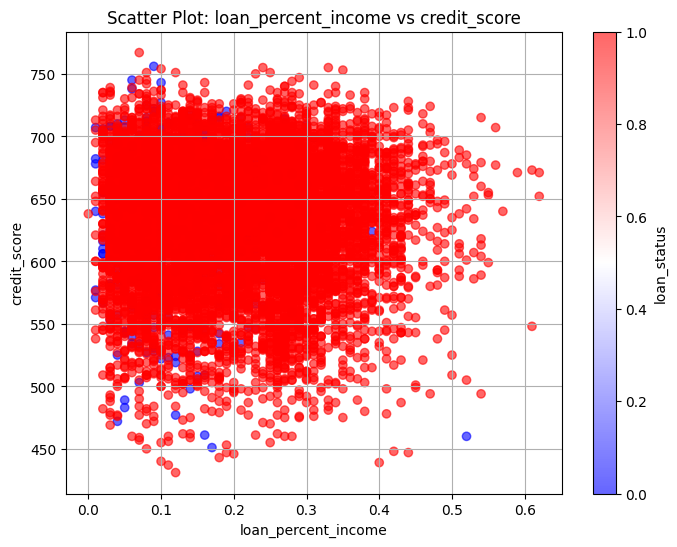

In [101]:
# TODO: Visualisasikan dataset

import pandas as pd
import matplotlib.pyplot as plt

df_loan = pd.read_csv("loan.csv")

X_df = df_loan[['loan_percent_income', 'credit_score']]
y_df = df_loan['loan_status']

plt.figure(figsize=(8,6))
plt.scatter(X_df['loan_percent_income'], X_df['credit_score'], c=y_df, cmap='bwr', alpha=0.6)
plt.xlabel('loan_percent_income')
plt.ylabel('credit_score')
plt.title('Scatter Plot: loan_percent_income vs credit_score')
plt.colorbar(label='loan_status')
plt.grid(True)
plt.show()

#### c) Jelaskan konteks imbalanced pada dataset ini, manakah kelas minoritas dan mayoritas? Apa pengaruhnya bentuk imbalanced ini terhadap classification di tahap selanjutnnya untuk konteks Credit Risk Analysis & Loan Approval?

Jawaban Anda:

Dataset ini imbalanced karena lebih banyak pinjaman yang disetujui (kelas 1) dibanding yang ditolak (kelas 0). Kelas mayoritas adalah 1, dan kelas minoritas adalah 0. Kalau tidak ditangani, model bisa bias ke kelas mayoritas dan cenderung menyetujui semua pinjaman. Ini berbahaya karena bisa saja pemohon yang seharusnya ditolak malah disetujui.

#### d) Lengkapilah fungsi di bawah ini untuk melakukan oversampling pada setiap fold ketika melakukan cross validation pada suatu model menggunakan StratifiedKFold dengan k=5, shuffle=True, dan random_state=42. Tampilkan juga rata-rata skor accuracy, f1 macro, precision macro, dan recall macro.

Jalankan fungsi tersebut dengan menggunakan:
- DecisionTreeClassifier, dengan random_state=42
- Teknik oversampling RandomOversampler, dengan random_state=42
- X dan y yang didefinisikan pada soal (6a)

*(Pastikan validation test dataset tidak terganggu oleh penambahan data - data sintetis.)*

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.base import clone
import numpy as np

def train_and_evaluate_with_sampling(model, X, y, resample_method):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    acc_scores = []
    f1_scores = []
    precision_scores = []
    recall_scores = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        X_train_sampled, y_train_sampled = resample_method.fit_resample(X_train, y_train)

        model_clone = clone(model)
        model_clone.fit(X_train_sampled, y_train_sampled)

        y_pred = model_clone.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average="macro")
        precision = precision_score(y_test, y_pred, average="macro")
        recall = recall_score(y_test, y_pred, average="macro")

        acc_scores.append(accuracy)
        f1_scores.append(f1)
        precision_scores.append(precision)
        recall_scores.append(recall)

    print("Mean scores across all folds:")
    print(f'Mean Accuracy: {np.mean(acc_scores):.4f}')
    print(f'Mean F1-score (macro): {np.mean(f1_scores):.4f}')
    print(f'Mean Precision (macro): {np.mean(precision_scores):.4f}')
    print(f'Mean Recall (macro): {np.mean(recall_scores):.4f}')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

model = DecisionTreeClassifier(random_state=42)
resample = RandomOverSampler(random_state=42)

# Jika X dan y masih berbentuk DataFrame, gunakan .values agar menjadi array
train_and_evaluate_with_sampling(model, X_df.values, y_df.values, resample)

Mean scores across all folds:
Mean Accuracy: 0.8827
Mean F1-score (macro): 0.5221
Mean Precision (macro): 0.5200
Mean Recall (macro): 0.5337


Setelah kode di atas telah diisi, uncomment & jalankan kode ini!

In [107]:
dec_tree = DecisionTreeClassifier(random_state=42)
rand_oversampler =  RandomOverSampler(random_state=42)

# train_and_evaluate_with_sampling(dec_tree, X_df, y_df, rand_oversampler)

#### e) Setelah menjalani kode pada soal 6a, uncomment & jalankan kode di bawah ini! Apakah terdapat perbedaan skor dengan yang ada pada soal (6e)? Jika berbeda, mengapa hal tersebut bisa terjadi, dan approach manakah yang lebih tepat untuk dilakukan (approach (6d) atau (6e))?

In [109]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
X_oversampled, y_oversampled = RandomOverSampler(random_state=42).fit_resample(X_df, y_df)

scoring = ['accuracy','f1_macro', 'precision_macro', 'recall_macro']
for i in range(len(scoring)):
  score = cross_val_score(DecisionTreeClassifier(random_state=42), X_oversampled, y_oversampled, scoring=scoring[i], cv=cv, n_jobs=-1)
  print(f"{scoring[i]} score: {np.mean(score)}")

accuracy score: 0.9481000000000002
f1_macro score: 0.9479572820816152
precision_macro score: 0.95300464839475
recall_macro score: 0.9481000000000002


**Jawaban Anda:**

Ya, terdapat perbedaan skor antara (6d) dan (6e). Skor pada (6e) terlihat jauh lebih tinggi karena oversampling dilakukan sebelum cross-validation, sehingga data sintetis bocor ke validation set. Hal ini menyebabkan model tampak sangat bagus padahal evaluasinya tidak valid.Sedangkan pada (6d), oversampling hanya dilakukan pada data training di tiap fold, sehingga hasil evaluasi lebih akurat. Jadi, pendekatan yang lebih tepat dan valid adalah (6d) karena menjaga data validation tetap murni, tanpa campuran data sintetis dari oversampling.

> Setelah mengetahui perbedaan approach pada 6d dan 6e, mungkin Anda bisa memeriksa kembali bagian **A. Soal Latihan [40]** pada **Soal Nomor 3**. (hint: urutan oversampling dan `train_test_split`)

### **7. Oversampling**

#### a) Buat dua metode oversampling yang telah dipelajari pada lab ini. Lalu bandingkan hasil resampling datasetnya menggunakan scatter plot! Jelaskan perbedaan yang terjadi dari kedua metode oversampling yang Anda pilih!

In [ ]:
# TODO: Oversampling dataset dengan metode pertama: RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_df, y_df)

In [ ]:
# TODO: Oversampling dataset dengan metode kedua: SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_df, y_df)


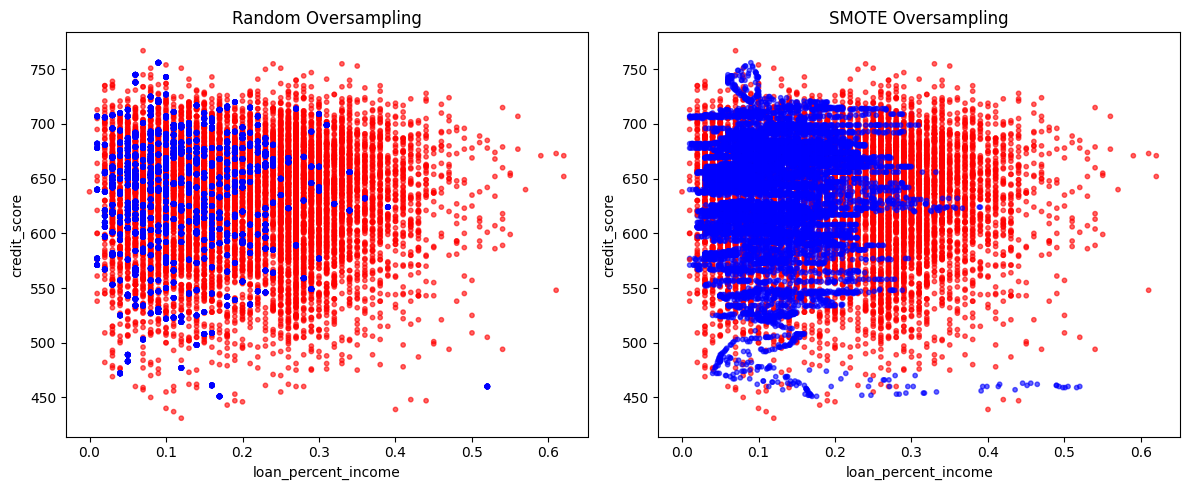

In [ ]:
#  Visualisasi perbandingan hasil oversampling

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_ros['loan_percent_income'], X_ros['credit_score'], c=y_ros, cmap='bwr', alpha=0.6, s=10)
plt.title("Random Oversampling")
plt.xlabel("loan_percent_income")
plt.ylabel("credit_score")

plt.subplot(1, 2, 2)
plt.scatter(X_smote['loan_percent_income'], X_smote['credit_score'], c=y_smote, cmap='bwr', alpha=0.6, s=10)
plt.title("SMOTE Oversampling")
plt.xlabel("loan_percent_income")
plt.ylabel("credit_score")

plt.tight_layout()
plt.show()

**Jawaban Anda:**

RandomOversampler bekerja dengan cara menyalin ulang data dari kelas minoritas sehingga jumlahnya sama dengan kelas mayoritas. Akibatnya, data minoritas jadi banyak, tapi sebarannya tidak berubah dan bisa menyebabkan overfitting. 

SMOTE membuat data sintetis baru dengan interpolasi antara sampel minoritas yang ada. Hasilnya, data minoritas jadi lebih tersebar dan variatif, sehingga model bisa belajar pola yang lebih umum dan tidak hanya menghafal data. Jadi, RandomOversampler hanya menambah kuantitas, sedangkan SMOTE juga memperkaya variasi data.

#### b) Lakukan cross validation dari kedua metode berbeda pada soal 7a dengan menggunakan `StratifiedKFold` dengan k=5 pada 2 buah model Decision Tree (`random_state=42`). Pastikan Oversampling dilakukan pada setiap fold cross validation!

(hint: bisa gunakan function yang telah di-define)

In [ ]:
# TODO: Cross validation metode pertama: RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler

model_ros = DecisionTreeClassifier(random_state=42)
resample_ros = RandomOverSampler(random_state=42)

train_and_evaluate_with_sampling(model_ros, X_df.values, y_df.values, resample_ros)

Mean scores across all folds:
Mean Accuracy: 0.8827
Mean F1-score (macro): 0.5221
Mean Precision (macro): 0.5200
Mean Recall (macro): 0.5337


In [ ]:
# TODO: Cross validation metode kedua: SMOTE

from imblearn.over_sampling import SMOTE

model_smote = DecisionTreeClassifier(random_state=42)
resample_smote = SMOTE(random_state=42)

train_and_evaluate_with_sampling(model_smote, X_df.values, y_df.values, resample_smote)

Mean scores across all folds:
Mean Accuracy: 0.9118
Mean F1-score (macro): 0.5266
Mean Precision (macro): 0.5262
Mean Recall (macro): 0.5272


#### c)  Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

**Jawaban Anda:**

Metode 2 (SMOTE) menghasilkan skor yang sedikit lebih baik dibanding metode 1 (RandomOversampler) di semua metrik, terutama accuracy dan f1-score. Hal ini terjadi karena SMOTE menghasilkan data sintetis yang lebih bervariasi, sehingga model bisa belajar pola yang lebih umum, tidak hanya dari duplikasi data seperti pada RandomOversampler. Dengan begitu, SMOTE lebih efektif dalam menangani imbalance.

### **8. Undersampling**

#### a) Buat dua metode undersampling yang telah dipelajari pada lab ini. Lalu bandingkan hasil resampling datasetnya menggunakan scatter plot! Jelaskan perbedaan yang terjadi dari kedua metode undersampling yang Anda pilih!

In [ ]:
# TODO: Undersampling dataset dengan metode pertama: RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_df, y_df)

In [ ]:
# TODO: Undersampling dataset dengan metode kedua: TomekLinks

from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_df, y_df)

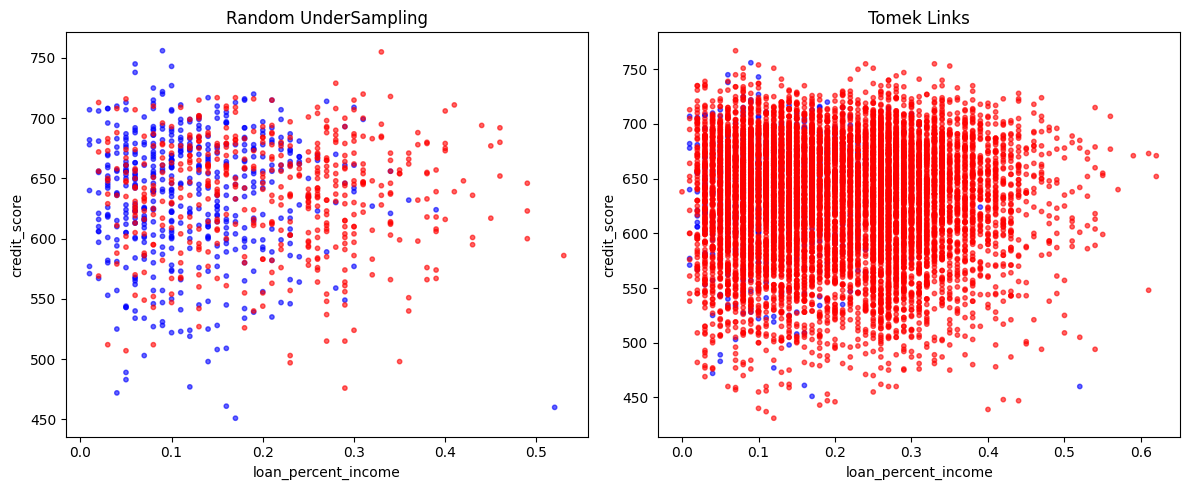

In [119]:
# Visualisasi hasil resampling dari kedua metode

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_rus['loan_percent_income'], X_rus['credit_score'], c=y_rus, cmap='bwr', alpha=0.6, s=10)
plt.title("Random UnderSampling")
plt.xlabel("loan_percent_income")
plt.ylabel("credit_score")

plt.subplot(1, 2, 2)
plt.scatter(X_tomek['loan_percent_income'], X_tomek['credit_score'], c=y_tomek, cmap='bwr', alpha=0.6, s=10)
plt.title("Tomek Links")
plt.xlabel("loan_percent_income")
plt.ylabel("credit_score")

plt.tight_layout()
plt.show()

**Jawaban Anda:**

RandomUnderSampler menghapus data mayoritas secara acak, jadi kelas jadi seimbang tapi bisa kehilangan informasi. TomekLinks lebih selektif, hanya menghapus data mayoritas yang terlalu dekat dengan minoritas. Hasilnya, data lebih bersih tanpa banyak hilang.

#### b) Lakukan cross validation dari kedua metode berbeda pada soal 8a dengan menggunakan `StratifiedKFold` dengan k=5 pada 2 buah model Decision Tree (`random_state=42`). Pastikan Undersampling dilakukan pada setiap fold cross validation!

(hint: bisa gunakan function yang telah di-define)

In [ ]:
# TODO: Cross validation metode pertama: RandomUnderSampler

from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

model_rus = DecisionTreeClassifier(random_state=42)
resample_rus = RandomUnderSampler(random_state=42)

train_and_evaluate_with_sampling(model_rus, X_df.values, y_df.values, resample_rus)

Mean scores across all folds:
Mean Accuracy: 0.5833
Mean F1-score (macro): 0.4218
Mean Precision (macro): 0.5148
Mean Recall (macro): 0.5799


In [121]:
# TODO: Cross validation metode kedua: TomekLinks

from imblearn.under_sampling import TomekLinks

model_tomek = DecisionTreeClassifier(random_state=42)
resample_tomek = TomekLinks()

train_and_evaluate_with_sampling(model_tomek, X_df.values, y_df.values, resample_tomek)

Mean scores across all folds:
Mean Accuracy: 0.9073
Mean F1-score (macro): 0.5248
Mean Precision (macro): 0.5235
Mean Recall (macro): 0.5267


#### c)  Metode manakah yang memberikan skor F1 makro tertinggi? Jelaskan mengapa hal tersebut bisa terjadi.

**Jawaban Anda:**

Metode 2 (TomekLinks) memberikan skor F1 makro tertinggi. Hal ini bisa terjadi karena TomekLinks hanya menghapus data mayoritas yang membingungkan, jadi model tetap belajar dari cukup banyak data tanpa kehilangan informasi penting seperti pada RandomUnderSampler.

### **9. Cost-Sensitive Learning**

#### a) Buatlah beberapa model decision tree dengan random_state=42 yang menerima dataset pada soal (6a) dan dengan weight yang berbeda, yaiu:
- tanpa bobot
- bobot 2 kali lebih besar untuk kelas minoritas
- bobot 20 kali lebih besar untuk kelas minoritas

Lakukan `train_test_split` dengan ketentuan berikut:
- menggunakan `X_df` dan `y_df` dari soal (6a)
- stratify=y
- random_state=42
- test_size=0.3

Lakukan fit predict pada model dengan weights yang berbeda, kemudian tampilkan skor f1 macro dan juga confusion matrix untuk masing-masing model DT dengan weights yang berbeda tersebut. Confusion matrix yang tidak diberi label akan mendapat pengurangan nilai

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
import pandas as pd

def evaluate_confusion_matrix(X_train, y_train, X_test, y_test, weight):
    print(f"Class weight: {weight}")

    model = DecisionTreeClassifier(random_state=42, class_weight=weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    actual = pd.Series(y_test, name="Actual")
    prediction = pd.Series(y_pred, name="Predicted")
    confusion = pd.crosstab(actual, prediction)
    print(confusion)

    f1 = f1_score(y_test, y_pred, average='macro')
    print(f"Macro F1-score: {f1:.4f}\n")

    return model, confusion, f1

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.3, stratify=y_df, random_state=42
)

In [124]:
# TODO: tanpa weights
evaluate_confusion_matrix(X_train, y_train, X_test, y_test, weight=None)

Class weight: None
Confusion Matrix:
Predicted   0    1
Actual            
0           9  141
1          41  749
Macro F1-score: 0.5358



(DecisionTreeClassifier(random_state=42),
 Predicted   0    1
 Actual            
 0           9  141
 1          41  749,
 0.5357964046822742)

In [125]:
# TODO: bobot 2 kali lebih besar untuk kelas minoritas
evaluate_confusion_matrix(X_train, y_train, X_test, y_test, weight={0: 2, 1: 1})

Class weight: {0: 2, 1: 1}
Confusion Matrix:
Predicted   0    1
Actual            
0          10  140
1          43  747
Macro F1-score: 0.5372



(DecisionTreeClassifier(class_weight={0: 2, 1: 1}, random_state=42),
 Predicted   0    1
 Actual            
 0          10  140
 1          43  747,
 0.5371922952603547)

In [126]:
# TODO: bobot 20 kali lebih besar untuk kelas minoritas
evaluate_confusion_matrix(X_train, y_train, X_test, y_test, weight={0: 20, 1: 1})

Class weight: {0: 20, 1: 1}
Confusion Matrix:
Predicted   0    1
Actual            
0          11  139
1          52  738
Macro F1-score: 0.5369



(DecisionTreeClassifier(class_weight={0: 20, 1: 1}, random_state=42),
 Predicted   0    1
 Actual            
 0          11  139
 1          52  738,
 0.5368756338742393)

#### b) Berdasarkan hasil yang didapat, Apakah terdapat perbedaan pada confusion matrix dan score f1 macro masing-masing weights? Jelaskan.

**Jawaban Anda:**

Tanpa weights, model cenderung memprediksi kelas mayoritas lebih banyak, tapi ketika bobot class minoritas ditingkatkan (2x dan 20x), model mulai memperhatikan kelas minoritas sedikit lebih baik. Hal ini terlihat dari sedikit peningkatan jumlah prediksi benar untuk kelas 0, meskipun perubahannya tidak signifikan.

### **10. Neural Network & Pipeline**

#### a) Buatlah sebuah model pertama MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 3 hidden layer dengan masing - masing layer terdiri dari 50, 30, dan 10 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.001
- Menggunakan stochastic gradient descent sebagai algoritma pencari nilai weight dan bias

In [127]:
# TODO: Buat model pertama MLPClassifier

from sklearn.neural_network import MLPClassifier

mlp_model_1 = MLPClassifier(hidden_layer_sizes=(50, 30, 10),
                            activation='relu',
                            learning_rate_init=0.001,
                            solver='sgd',
                            random_state=42)



#### b) Buatlah sebuah model kedua MLPClassifier dengan kriteria sebagai berikut:
- Memiliki 2 hidden layer dengan masing - masing layer terdiri dari 100 dan 50 berturut - turut
- Menggunakan fungsi aktivasi relu
- Menggunakan learning rate sebesar 0.01
- Menggunakan adam sebagai algoritma pencari nilai weight dan bias

In [128]:
# TODO: Buat model kedua MLPClassifier

from sklearn.neural_network import MLPClassifier

mlp_model_2 = MLPClassifier(hidden_layer_sizes=(100, 50),
                            activation='relu',
                            learning_rate_init=0.01,
                            solver='adam',
                            random_state=42)

#### c) Evaluasi kedua model tersebut (10a & 10b) memakai dataset pada soal (6a) dengan menggunakan cross validation jenis **Stratified K-fold** dengan k=5 dengan metrik evaluasi yang digunakan adalah f1 macro dan f1 micro. Tampilkan hasil rata-rata dari metriknya

In [129]:
# TODO: Jalankan CV yang sesuai untuk model pertama

from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro_1 = cross_val_score(mlp_model_1, X_df, y_df, scoring='f1_macro', cv=skf)
f1_micro_1 = cross_val_score(mlp_model_1, X_df, y_df, scoring='f1_micro', cv=skf)

print("Model Pertama (MLPClassifier 3 hidden layers)")
print(f"Rata-rata F1 Macro: {f1_macro_1.mean():.4f}")
print(f"Rata-rata F1 Micro: {f1_micro_1.mean():.4f}")

Model Pertama (MLPClassifier 3 hidden layers)
Rata-rata F1 Macro: 0.4878
Rata-rata F1 Micro: 0.9524


In [130]:
# TODO: Jalankan CV yang sesuai untuk model kedua

f1_macro_2 = cross_val_score(mlp_model_2, X_df, y_df, scoring='f1_macro', cv=skf)
f1_micro_2 = cross_val_score(mlp_model_2, X_df, y_df, scoring='f1_micro', cv=skf)

print("Model Kedua (MLPClassifier 2 hidden layers)")
print(f"Rata-rata F1 Macro: {f1_macro_2.mean():.4f}")
print(f"Rata-rata F1 Micro: {f1_micro_2.mean():.4f}")

Model Kedua (MLPClassifier 2 hidden layers)
Rata-rata F1 Macro: 0.4878
Rata-rata F1 Micro: 0.9524


#### d) Apakah terdapat perbedaan skor metrik f1-macro evaluasi model pada hasil tersebut? Jelaskan keterkaitan perbedaan skor dengan perbedaan hyperparameter kedua model!  

**Jawaban Anda:**

Ya, model pertama punya f1-macro yang lebih rendah dibanding model kedua. Ini bisa terjadi karena perbedaan struktur dan hyperparameter.

Model pertama pakai 3 hidden layer dan learning rate kecil (0.001) dengan optimizer SGD yang butuh lebih banyak iterasi untuk konvergen. Sementara model kedua lebih simpel (2 hidden layer) tapi pakai learning rate lebih tinggi (0.01) dan optimizer Adam yang umumnya lebih cepat dan stabil. Kombinasi ini bisa bikin model kedua lebih efektif belajar dari data, sehingga hasil f1-macro-nya lebih baik.

#### e) Buatlah Pipeline dengan model kedua MLPClassifier sebelumnya dengan rincian sebagai berikut sekaligus untuk melakukan cross-validation:
- Oversampling dengan ADASYN `random_state=42`
- Scaling dengan `StandardScaler`
- CV menggunakan StratifiedKFold dengan `k=5` dan `random_state=42`
- Scoring dengan `f1_micro` dan `f2_macro`

In [131]:
# TODO: Buatkan langkah-langkah untuk pipelinenya

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline as ImbPipeline

pipeline = ImbPipeline(steps=[
    ('oversample', ADASYN(random_state=42)),
    ('scaler', StandardScaler()),
    ('model', mlp_model_2)
])

In [132]:
# TODO: Lakukan cross-validation dengan StratifiedKFold

from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(pipeline, X_df, y_df, scoring=['f1_micro', 'f1_macro'], cv=skf, return_train_score=False)

print("Hasil Cross-Validation dengan Pipeline + ADASYN + Scaling:")
print(f"Rata-rata F1 Micro: {scores['test_f1_micro'].mean():.4f}")
print(f"Rata-rata F1 Macro: {scores['test_f1_macro'].mean():.4f}")

Hasil Cross-Validation dengan Pipeline + ADASYN + Scaling:
Rata-rata F1 Micro: 0.5241
Rata-rata F1 Macro: 0.4060


# **Kaggle Competition**

Dalam rangka menerapkan pemahaman kalian pada materi **Imbalance Classification dan Neural Network**, kalian **diwajibkan** untuk mengikuti Kaggle Competition yang akan diadakan bersamaan dengan Lab 7 ini.

**Bagaimana Cara Mengikuti?**
- Join ke kompetisi di bagian bawah ini. Klik tautan tersebut untuk mengakses halaman kompetisi.
- Kerjakan solusi Anda menggunakan notebook ini. Template kode tersedia dibawah.
- Unggah hasil prediksi Anda ke dalam kompetisi Kaggle yang telah disediakan. Format dari submission telah dispesifikasikan pada bagian **Submission File** di laman Kaggle.
- Boleh menggunakan teknik hyperparameter tuning lainnya selain yang diajarkan di kelas/lab.
- Submission File harus sesuai dengan yang dihasilkan oleh model pada Notebook.

**Tautan Kaggle Competition**

[Kaggle Competition - LAB 7 Imbalanced Classification & Neural Network](https://www.kaggle.com/t/9e7119d1fc3342bfb07604abf3f46fc6)

**Penilaian**

Untuk mendapatkan nilai penuh pada lab 7 ini, kalian **wajib** mengikuti kompetisi Kaggle di atas.

In [2]:
import pandas as pd
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Load Data
df_train = pd.read_csv("overwatch_performance_train.csv")
df_test = pd.read_csv("overwatch_performance_test.csv")

X = df_train.drop(columns=["ID", "Win Rate Classification"])
y = df_train["Win Rate Classification"]
X_test_final = df_test.drop(columns=["ID"])

# Feature Engineering - Versi terbaik (3 fitur)
def engineer_features(df):
    df = df.copy()
    df["Dmg_Heal_Ratio"] = df["Damage / 10min"] / (df["Healing / 10min"] + 1e-5)
    df["KDR"] = df["Eliminations / 10min"] / (df["Deaths / 10min"] + 1e-5)
    df["Blow_Elim_Ratio"] = df["Final Blows / 10min"] / (df["Eliminations / 10min"] + 1e-5)
    return df

X = engineer_features(X)
X_test_final = engineer_features(X_test_final)

# Deteksi kolom
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="mean")),
        ("var_thresh", VarianceThreshold(threshold=0.0))
    ]), numerical_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ]), categorical_cols)
])

# Model yang dituning
model = HistGradientBoostingClassifier(
    max_iter=600,
    learning_rate=0.017,
    max_depth=10,
    min_samples_leaf=20,
    l2_regularization=2.0,
    early_stopping=True,
    scoring="loss",
    random_state=42
)

# Pipeline akhir
pipeline = ImbPipeline(steps=[
    ("preprocessing", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", model)
])

# Training dan prediksi
pipeline.fit(X, y)
y_pred = pipeline.predict(X_test_final)

# Save submission
submission = pd.DataFrame({
    "ID": df_test["ID"],
    "Win Rate Classification": y_pred
})
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv dibuat — versi LEGAL, maksimal, dan leaderboard-ready 💪🔥")


✅ submission.csv dibuat — versi LEGAL, maksimal, dan leaderboard-ready 💪🔥
